# DOPP 2021W Exercise 2

### Before you get started, please read the instructions in this notebook carefully.

## Preliminaries

- Please use only Python **version 3.6 or higher**. It is recommended to run the notebook on the JupyterHub. 


- This notebook will be scored using [nbgrader](https://nbgrader.readthedocs.io/en/stable/index.html). 
- Please use the code stubs provided, add and modify your code only at the provided markers, do not rename any functions. 
- Make sure that your assignment executes without any errors on the JupyterHub before submitting it. Submissions that do not execute will not be accepted.
- Do not change cell tags, as this may mess up the Validation and auto-grading features.


The submission deadline is **29.11.2021 23:55.**

Sections marked with `# YOUR CODE HERE` must be used to implement the functionality.
Cells containing `YOUR ANSWER HERE` must be used to fill in textual answers.

There is a total of 100 points that can be reached.

You might be awarded additional points for **good code quality**.

In [1]:
# Note: The only imports allowed are Python's standard library, pandas, numpy, scipy, matplotlib and scikit-learn
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

# add imports as needed
# import sklearn...


In [2]:
ls

data/                 influenza_data_dataframe_sample.png
exercise_2.ipynb      weather_data_dataframe_sample.png
exercise_2-raw.ipynb


## Goal

In this exercise, you will 
 * use `pandas` to read, prepare and transform data,
 * use `matplotlib` to visually analyse data,
 * use `scikit-learn` to build prediction models.


The goal of this exercise is to model the relationship between weather observations and the prevalence of new influenza infections.

To investigate a potential relationship, we will use two datasets:
 * hourly [weather observation data](https://dane.imgw.pl/#dane-archiwalne) in [Łódź](https://en.wikipedia.org/wiki/%C5%81%C3%B3d%C5%BA), Poland (2010-2020)
 * weekly reports on [new influenza infections](https://www.gov.pl/web/wsse-lodz/zachorowania-na-grype) in Łódź (2010-2021).

The data to be used can be found in the subdirectory named `data`. 

To complete this exercise, you will have to:
* prepare the data, which (at minimum) involves the following:
    - handling missing values,
    - handling outliers
    - temporal alignment (i.e. convert hourly weather data to weekly data using appropriate aggregation functions and then merging with influenza data),
* analyse the data:
    - compare descriptive statistics,
    - visually investigate the raw data to gain an understanding of the data, identify patterns, outliers etc.,
    - look at the relationship between the variables of interest,
* model the relationship:
    - fit a model that predicts new infections from weather observation data.
    
    
**Note:** In case you encounter problems with loading and processing the data (tasks 1-5), we will provide you also with a pickled version of preprocessed and merged datasets that you can use to complete the remaining parts of the exercise (tasks 6-8).

## Task 0: Data Examination

Maximum number of *extra* points for this task: **5**

- This is an open task, where you are free to show all the data examination and experimentations preceeding actual work on the assignment
- You can also include some preliminary plots and analysis of the data content which you used to solve remaining tasks
- You can create additional cells for this task


In [3]:
ls

data/                 influenza_data_dataframe_sample.png
exercise_2.ipynb      weather_data_dataframe_sample.png
exercise_2-raw.ipynb


In [4]:
# YOUR CODE HERE
#raise NotImplementedError()
df_weather = pd.read_csv(r'data/weather/s_t_465_2011.csv',low_memory=False,header = None)
df_weather.columns = pd.read_csv('data/weather/names.txt',low_memory=False,header = None).squeeze()
df_weather

0     Station code Station name  Year  Month  Day  Hour  \
0        351190465         ŁÓDŹ  2011      1    1     0   
1        351190465         ŁÓDŹ  2011      1    1     1   
2        351190465         ŁÓDŹ  2011      1    1     2   
3        351190465         ŁÓDŹ  2011      1    1     3   
4        351190465         ŁÓDŹ  2011      1    1     4   
...            ...          ...   ...    ...  ...   ...   
8755     351190465         ŁÓDŹ  2011     12   31    19   
8756     351190465         ŁÓDŹ  2011     12   31    20   
8757     351190465         ŁÓDŹ  2011     12   31    21   
8758     351190465         ŁÓDŹ  2011     12   31    22   
8759     351190465         ŁÓDŹ  2011     12   31    23   

0    Cloud base height CL CM encrypted [code]  Measurement status HPOD  \
0                                           3                      NaN   
1                                           4                      NaN   
2                                           4                      NaN   
3                                           4                      NaN   
4                                           4                      NaN   
...                                       ...                      ...   
8755                                        7                      NaN   
8756                                        3                      NaN   
8757                                        7                      NaN   
8758                                        5                      NaN   
8759                                        5                      NaN   

0     Lower cloud base height  [m]  Measurement status HPON  ...  \
0                              270                      NaN  ...   
1                              330                      NaN  ...   
2                              300                      NaN  ...   
3                              330                      NaN  ...   
4                              400                      NaN  ...   
...                            ...                      ...  ...   
8755                          1900                      NaN  ...   
8756                           210                      NaN  ...   
8757                          1800                      NaN  ...   
8758                           700                      NaN  ...   
8759                           700                      NaN  ...   

0     Freshly fallen snow cover height [cm]  Measurement status HSS  \
0                                         0                     8.0   
1                                         0                     8.0   
2                                         0                     8.0   
3                                         0                     8.0   
4                                         0                     8.0   
...                                     ...                     ...   
8755                                      0                     8.0   
8756                                      0                     8.0   
8757                                      0                     8.0   
8758                                      0                     8.0   
8759                                      0                     8.0   

0    Snow cover height in the plot [cm] Measurement status GRSN  \
0                                     0                     8.0   
1                                     0                     8.0   
2                                     0                     8.0   
3                                     0                     8.0   
4                                     0                     8.0   
...                                 ...                     ...   
8755                                  0                     8.0   
8756                                  0                     8.0   
8757                                  0                     8.0   
8758                                  0                     8.

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Task 1: Load Data

Total number of points for completing this task: **20**

### Weather observations

As a first step, implement the method `load_weather_data()`, which should read all individual (yearly) datasets from the csv files in `data\weather\` into a single `pd.DataFrame` and return it. 

- make sure that you load all the data (2010-2020)
- make sure that all columns are appropriately named, use `data\weather\names.txt` file to fill in column names
- from the `Year`, `Month`, `Day` and `Hour` columns create column `Date` and `Week`, where `Date` is a [`pandas.Timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html) object and `Week` contains the week number of the date. Use Pandas built-in datetime handling features.
- create a `MultiIndex` from the date columns with the following hierarchy: `Year` - `Month` - `Week` - `Day` - `Hour` (make sure to label them accordingly)


**Hints:**
 
 - LOOK at the data in the original files
 - It is advisable not to append each data set individually, but to read each data frame, store it into a list and  combine them once at the end.
 - Your resulting data frame should look as follows:

![Weather data frame example](weather_data_dataframe_sample.png)

In [6]:
def load_weather_data():
    """ 
    Load all weather data files and combine them into a single Pandas DataFrame.
    Add a week column and a hierarchical index (year, month, week, day)
    
    Returns
    --------
    weather_data: data frame containing the weather data
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    dir_weather = r'data/weather'
    weather_data_files = []
    for file in os.listdir(dir_weather):
        if file.endswith('.csv'):
            path = os.path.join(dir_weather,file)
            data = pd.read_csv(path,low_memory=False,header = None)
            weather_data_files.append(data)
    df = pd.concat(weather_data_files)
    #df.columns = pd.read_csv('data/weather/names.txt',header = None)

    col_names = pd.read_csv('data/weather/names.txt',low_memory=False,header = None).squeeze()

    df.columns = col_names
    
    date = []
    week = []

    for y,m,d,h in zip(df['Year'],df['Month'],df['Day'],df['Hour']):
        n = pd.Timestamp(year=y, month=m, day=d, hour=h)
        date.append(n)
        week.append(n.weekofyear)
    
    # create data and week column
    df['Date'] = pd.Series(date) 
    df['Week'] = pd.Series(week) 
    

    df.set_index(['Year', 'Month','Week','Day', 'Hour'],inplace = True)

    
    weather_data = df
    
    
    return weather_data

data_weather = load_weather_data()

In [7]:
data_weather.shape

(96432, 104)

In [8]:
assert data_weather.shape[0] == 96432
assert data_weather.shape[1] > 102

# additional tests

In [9]:
# hidden tests

**Q** Which combination of year+week has the lowest number of entries? You should find the respective entry/entries using pandas. Return the first answer if there is more than one combination fulfilling these criteria.

**Ans:**  Year = 2011, Week = 52, #Entries = 168

In [10]:
# Counting combination of year+week that has the lowest number of entries
d2 = data_weather.swaplevel(1, 2)
sub_index_list = [(y,w) for y,w,m,d,h in d2.index.tolist()]
count = []
for y_w in np.unique(sub_index_list, axis = 0):
    count.append([y_w[0],y_w[1],len(d2.loc[(y_w[0],y_w[1]),:])])
count = np.array(count)
np.unique(count[:,2])

array([168, 192])

In [11]:
# fill your answer into these variables
year = sub_index_list[np.argmin(count[:,2])][0]
week = sub_index_list[np.argmin(count[:,2])][1]
year,week
# YOUR CODE HERE
#raise NotImplementedError()

(2011, 52)

In [12]:
# hidden tests

In [13]:
(data_weather.groupby(['Year','Week'])['Station code'].count())

Year  Week
2010  1       168
      2       168
      3       168
      4       168
      5       168
             ... 
2020  48      168
      49      168
      50      168
      51      168
      52      192
Name: Station code, Length: 572, dtype: int64

### Influenza infections

Load and prepare the second dataset (`data/influenza/influenza.csv`), which contains the number of new influenza infections on a weekly basis, as follows:

- Stack all seasonal data into one column
- Convert months written in roman numerals to arabic numbers (II -> 2) and save them into `Month` column
- For each entry extract year based on the season and month values
- Extract week data into column `Week`
- Create a `MultiIndex` from the `Year` and `Week` columns
- Rename column containing influenza cases as `Influenza_cases`
- Make sure that all columns are appropriately typed
- Remove rows with missing infection counts
- Your resulting data frame should look as follows:

![Example data frame](influenza_data_dataframe_sample.png)

In [14]:
def load_influenza_data():
    """ 
    Load and prepare the influenza data file
    
    Returns
    --------
    influenza_data: data frame containing the influenza data
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    #nd.array
    def romanToarabic(col):
        n = []
        for s in col:
            if s == 'I.':
                n.append(1)
            elif s == 'II.':
                n.append(2)
            elif s == 'III.':
                n.append(3)
            elif s == 'IV.':
                n.append(4)
            elif s == 'V.':
                n.append(5)
            elif s == 'VI.':
                n.append(6)
            elif s == 'VII.':
                n.append(7)
            elif s == 'VIII.':
                n.append(8)
            elif s == 'IX.':
                n.append(9)
            elif s == 'X.':
                n.append(10)
            elif s == 'XI.':
                n.append(11)
            elif s == 'XII.':
                n.append(12)
        return pd.Series(n)
    
    dir_influenza = r'data/influenza'
    for f in os.listdir(dir_influenza):
        path = os.path.join(dir_influenza,f)
    data = pd.read_csv(path,low_memory=False)
    
    df_stacked = data.set_index('week').stack()
    df = pd.DataFrame(df_stacked).reset_index()
    df = df.rename(columns={"level_1": "Year", "week": "Week"})
    
    # custom number of splits
    df[['Week', 'Month']] = df['Week'].str.split('.', n=1, expand=True)
    df = df.T.drop_duplicates().T
    df['Month'] = romanToarabic(df['Month'])
    df["Year"] = df["Year"].str.replace('season', "")
    
    year = []
    for y,m in zip(df.Year,df.Month):
        lhs, rhs = y.split("/", 1)
        #year.append(lhs)
        if m>=9:
            year.append(lhs)
        elif m<=4:
            year.append(rhs)
     
    
    df["Year"] = year
    df["Year"] = df['Year'].str.strip(' ')
    df["Year"] = df["Year"].astype(int)
    df["Week"] = df["Week"].astype(int)
    influenza_data = df
    influenza_data.set_index(['Year','Week'],inplace = True)
    influenza_data.rename(columns={0:"Influenza_cases"},inplace = True)
    influenza_data = influenza_data.sort_index(level=0)
    
    return influenza_data

data_influenza = load_influenza_data()

In [15]:
assert data_influenza.shape == (356, 2)
# additional tests


In [16]:
# hidden tests

**Q:** Which combination of year+week shows the highest number of infections? You should find the respective entry/entries using pandas. Return the first answer if there is more than one combination fulfilling these criteria.

**Ans:**  Year = 2017, Week = 4, #Infections = 25194

In [17]:
# fill your answer into these variables
yw = (data_influenza.groupby(['Year','Week'])['Influenza_cases'].sum())
year = data_influenza.index[np.argmax(yw)][0] 
week = data_influenza.index[np.argmax(yw)][1]
year, week
# YOUR CODE HERE
#raise NotImplementedError()

(2017, 4)

In [18]:
yw.loc[year,week]

25194.0

In [19]:
# hidden tests

**Q:** Which combination of year+month shows the highest number of infections? You should find the respective entry/entries using pandas. Return the first answer if there is more than one combination fulfilling these criteria.

**Ans:**  Year = 2013, Month = 1 ,#Infections = 65301

In [20]:
# fill your answer into these variables
ym = (data_influenza.groupby(['Year','Month'])['Influenza_cases'].sum())
year = ym.index[np.argmax(ym)][0]
month = ym.index[np.argmax(ym)][1]
year,month
# YOUR CODE HERE
#raise NotImplementedError()

(2013, 1)

In [21]:
ym.loc[year,month]

65301.0

In [22]:
# hidden tests

In [23]:
data_weather.shape

(96432, 104)

## Task 2: Handling Missing Values

Total number of points for completing this task: **15**

If you take a closer look at the data, you will notice that a few of the observations are missing.

There is a wide range of standard strategies to deal with such missing values, including:

- row deletion
- substitution methods (e.g., replace with mean or median)
- hot-/cold-deck methods (impute from a randomly selected similar record)
- regression methods

To decide which strategy is appropriate, it is essential to investigate the mechanism that led to the missing values to find out whether the missing data is missing completely at random, missing at random, or missing not at random. 

 - **MCAR** (Missing Completely At Random) means that there is no relationship between the missingness of the data and any of the values.
 - **MAR** (Missing At Random) means that there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data.
 - **MNAR** (Missing Not At Random) means that there is a systematic relationship between the propensity of a value to be missing and its values. 
 

_______

You talked to the meteorologists who compiled the data to find out more about what mechanisms may have caused the missing values. 

They told you that they do not know why some of the temperature (`Air Temperature [°C]`) and pressure (`Surface pressure [hPa]` and `Mean sea-level pressure [hPa]`) readings are missing, but someone may have forgotten to record them. In any case, the propensity of temperature and pressure values to be missing does not have anything to do with the weather itself.

As far as the missing humidity readings are concerned (`Relative humidity [%]`), according to their experience, they suspect that the humidity sensor is less reliable when the wind blows directly from the West.

Check the plausibility of these hypotheses in the data, consider the implications, and devise an appropriate strategy to deal with the various missing values.

You also received an additional file from the meteorologists: `data\weather\description.txt` that contains description of the columns. According to that file, if data in a column called `Measurement status _X_` contains a specific code (either 8 or 9) then the preceding column value is not reliable. For example, when value for `Measurement status PORW` is equal to 8 or 9, then readings for `Wind gust  [m/s]` column should be treated as missing.


Because of the sensitivity of the sensor, wind gust data is unavailable for many records. Meteorologists tell you, that for this station, missing wind gust data could be easily approximated by multiplying standard wind speed (`Wind speed  [m/s]`) by a factor o 1.55.


- Handle missing values for the following columns: `Air Temperature [°C]`, `Surface pressure [hPa]`, `Mean sea-level pressure [hPa]`, `Relative humidity [%]` and `Wind gust  [m/s]`
- For the remaining columns, especially `Measurement status _X_`, it is ok to fill the missing values with 0

To implement your strategy, you can use a range of standard mechanisms provided by Pandas, by implementing `handle_missingValues_simple`, or implement a custom strategy (for extra points, by implementing `handle_missingValues_advanced`).

In [24]:
def missing_values_table(df):
        NaN_val = df.isnull().sum()
        NaN_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([NaN_val, NaN_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 :'#NaN', 1 : '% NaN'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[mz_table.iloc[:,0] != 0].sort_values('% NaN', ascending=False)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " rows.\n"      
            + str(mz_table.shape[0]) +
              " columns have NaN values.\n"
               + str(len(mz_table[mz_table.iloc[:,0] == df.shape[0]])) +
              " columns have all NaN values.\n")
        print('Displaying columns having NaN values')
        return mz_table
missing_values_table(data_weather)

Selected dataframe has 104 columns and 96432 rows.
59 columns have NaN values.
14 columns have all NaN values.

Displaying columns having NaN values


#NaN       % NaN Data Type
0                                                                 
Measurement status HPOD                96432  100.000000   float64
Measurement status TEMP                96432  100.000000   float64
Measurement status CHCH                96432  100.000000   float64
Measurement status CHCM                96432  100.000000   float64
Measurement status CLCM                96432  100.000000   float64
Measurement status APP                 96432  100.000000   float64
Measurement status PPPM                96432  100.000000   float64
Measurement status PPPS                96432  100.000000   float64
Measurement status TPTR                96432  100.000000   float64
Measurement status WLGW                96432  100.000000   float64
Measurement status CPW                 96432  100.000000   float64
Measurement status CHCL                96432  100.000000   float64
Measurement status NOG                 96432  100.000000   float64
Measurement status WID                 96432  100.000000   float64
Measurement status FWR                 96431   99.998963   float64
Ice index [L/W]                        96431   99.998963    object
Measurement status KRWR                96431   99.998963   float64
Instrument measurement 2 (higher) [P]  93439   96.896259    object
Shape of the cover [code]              90476   93.823627    object
Snow type [code]                       90476   93.823627    object
Measurement status WIDO                87672   90.915879   float64
Measurement status DEFI                87672   90.915879   float64
Measurement status WIDA                87672   90.915879   float64
Minute of occurrence of the gust       85076   88.223826   float64
Hour of occurrence of the gust         85076   88.223826   float64
Instrument measurement 1 (lower) [P]   68508   71.042807    object
Measurement status HPON                56212   58.291853   float64
Measurement status ROSW                50448   52.314584   float64
Occurrence of dew [0/1]                45984   47.685416   float64
Measurement status USLN                26422   27.399618   float64
Measurement status SGRN                16072   16.666667   float64
Measurement status TG05                13134   13.619960   float64
Measurement status PORW                11575   12.003277   float64
Measurement status PORK                11356   11.776174   float64
Measurement status TG10                10865   11.267007   float64
Measurement status TG50                10855   11.256637   float64
Measurement status TG20                10854   11.255600   float64
Clouds CM text                          8762    9.086195    object
Cloud base height text [description]    8761    9.085158    object
Clouds CH text                          8760    9.084121    object
Clouds CL text                          8760    9.084121    object
Measurement status HPOW                 8555    8.871536   float64
Measurement status TG100                7734    8.020159   float64
Measurement status TMAX                 7306    7.576323   float64
Measurement status TMIN                 7306    7.576323   float64
Measurement status TGMI                 7302    7.572175   float64
Measurement status WO6G                 5138    5.328107   float64
Measurement status ROPT                 5137    5.327070   float64
Surface pressure [hPa]                  5033    5.219222   float64
Mean sea-level pressure [hPa]           5033    5.219222   float64
Air Temperature [°C]                    2024    2.098888   float64
Relative humidity [%]                    801    0.830637   float64
Measurement status PKSN                  691    0.716567   float64
Measurement status GRSN                  369    0.382653   float64
Measurement status HSS                   268    0.277916   float64
Measurement status RWSN                  233    0.241621   float64
Measurement status HPRO                  233    0.241621   float64
Measurement status CIPR                  233    0.241621   float64
Measurement status T

In [25]:
# YOUR CODE HERE
#raise NotImplementedError()
# data_weather.isnull().sum()

## looking at the correlation between columns
c = data_weather.corr()
display(c>0.5)

display(data_weather[['Air Temperature [°C]','Surface pressure [hPa]','Mean sea-level pressure [hPa]']],
data_weather.loc[:,('Relative humidity [%]','Wind direction  [°]')])


0                             Station code  Measurement status HPOD  \
0                                                                     
Station code                         False                    False   
Measurement status HPOD              False                    False   
Lower cloud base height  [m]         False                    False   
Measurement status HPON              False                    False   
Higher cloud base height [m]         False                    False   
...                                    ...                      ...   
Measurement status GRSN              False                    False   
Sample height [cm]                   False                    False   
Measurement status HPRO              False                    False   
Sample weight [g]                    False                    False   
Measurement status CIPR              False                    False   

0                             Lower cloud base height  [m]  \
0                                                            
Station code                                         False   
Measurement status HPOD                              False   
Lower cloud base height  [m]                          True   
Measurement status HPON                              False   
Higher cloud base height [m]                         False   
...                                                    ...   
Measurement status GRSN                              False   
Sample height [cm]                                   False   
Measurement status HPRO                              False   
Sample weight [g]                                    False   
Measurement status CIPR                              False   

0                             Measurement status HPON  \
0                                                       
Station code                                    False   
Measurement status HPOD                         False   
Lower cloud base height  [m]                    False   
Measurement status HPON                         False   
Higher cloud base height [m]                    False   
...                                               ...   
Measurement status GRSN                         False   
Sample height [cm]                              False   
Measurement status HPRO                         False   
Sample weight [g]                               False   
Measurement status CIPR                         False   

0                             Higher cloud base height [m]  \
0                                                            
Station code                                         False   
Measurement status HPOD                              False   
Lower cloud base height  [m]                         False   
Measurement status HPON                              False   
Higher cloud base height [m]                          True   
...                                                    ...   
Measurement status GRSN                              False   
Sample height [cm]                                   False   
Measurement status HPRO                              False   
Sample weight [g]                                    False   
Measurement status CIPR                              False   

0                             Measurement status HPOW  Visibility [code]  \
0                                                                          
Station code                                    False              False   
Measurement status HPOD                         False              False   
Lower cloud base height  [m]                    False              False   
Measurement status HPON                         False              False   
Higher cloud base height [m]                    False              False   
...                                               ...                ...   
Measurement status GRSN                         False              False   
Sample height [cm]                  

0                         Air Temperature [°C]  Surface pressure [hPa]  \
Year Month Week Day Hour                                                 
2011 1     52   1   0                     -0.3                   991.3   
                    1                     -0.2                   990.4   
                    2                     -0.3                   989.5   
                    3                     -0.1                   987.8   
                    4                     -0.1                   987.3   
...                                        ...                     ...   
2010 12    52   31  19                    -0.2                   993.5   
                    20                    -0.2                   993.4   
                    21                    -0.3                   993.1   
                    22                    -0.2                   992.7   
                    23                   -60.0                   992.0   

0                         Mean sea-level pressure [hPa]  
Year Month Week Day Hour                                 
2011 1     52   1   0                            1015.2  
                    1                            1014.3  
                    2                            1013.4  
                    3                            1011.6  
                    4                            1011.1  
...                                                 ...  
2010 12    52   31  19                           1017.4  
                    20                           1017.3  
                    21                           1017.0  
                    22                           1016.6  
                    23                           1015.9  

[96432 rows x 3 columns]

0                         Relative humidity [%]  Wind direction  [°]
Year Month Week Day Hour                                            
2011 1     52   1   0                      94.0                  250
                    1                      91.0                  248
                    2                      92.0                  248
                    3                      90.0                  235
                    4                      89.0                  239
...                                         ...                  ...
2010 12    52   31  19                      NaN                  270
                    20                     97.0                  260
                    21                     96.0                  260
                    22                     97.0                  250
                    23                     95.0                  250

[96432 rows x 2 columns]

In [26]:
def handle_missingValues_simple(incomplete_data):
    """ 
    Parameters
    --------
    incomplete_data: data frame containing missing values 
    
    Returns
    --------
    complete_data: data frame not containing any missing values
    """
    
    df = incomplete_data
   
    # Remove rows with all NaN values
    complete_data = df.dropna(axis=0, how='all')

    # YOUR CODE HERE
    #raise NotImplementedError()
    return complete_data


def handle_missingValues_advanced(incomplete_data):
    """ 
    Parameters
    --------
    data: data frame containing missing values 
    
    Returns
    --------
    data: data frame not containing any missing values
    """

    df = incomplete_data
    
    # Air Temperature:
    df['Air Temperature [°C]'] = df['Air Temperature [°C]'].interpolate()
    # Surface pressure [hPa]
    df['Surface pressure [hPa]'] = df['Surface pressure [hPa]'].interpolate()
    # Mean sea-level pressure [hPa]
    df['Mean sea-level pressure [hPa]'] = df['Mean sea-level pressure [hPa]'].interpolate()
    
    # Relative humidity
    df['Relative humidity [%]'] = np.where(df['Wind direction  [°]'].between(258.75, 281.25, inclusive="both"), 
                                           np.nan, df['Relative humidity [%]'])
    df['Relative humidity [%]'] = df['Relative humidity [%]'].interpolate()
    
    
    ##### Measurement status
    
    # Implementation: if data in a column called Measurement status _X_ contains a specific code (either 8 or 9) 
    #then the preceding column value is not reliable.
    measurment_col = df.filter(regex='Measurement status').columns
    for col in df.filter(regex='Measurement status').columns:
        index_no = df.columns.get_loc(col)
        df.iloc[:,index_no-1] = np.where(df[col].between(8, 9, inclusive="both"), np.nan
                                                       , df.iloc[:,index_no-1])
        colname = df.columns[index_no-1]
        if (colname != 'Wind gust  [m/s]'):
            #df.iloc[:,index_no-1] = df.iloc[:,index_no-1].interpolate()
            df.loc[:,colname] = df.loc[:,colname].interpolate()
        else:
            df.loc[:,colname] = df.loc[:,'Wind speed  [m/s]']*1.55
            
    # Implementation: For the remaining columns, especially Measurement status _X_,
    # filling the missing values with 0
    for col in df.filter(regex='Measurement status').columns:     
        df[col] = df[col].fillna(0)
    
    
    zero_cols = [ col for col, is_zero in ((df == 0).sum() == df.shape[0]).items() if is_zero ]
    df.drop(zero_cols, axis=1, inplace=True)
    
    # Delete columns containing either 75% or more than 75% NaN Values
    perc = 70.0
    min_count =  int(((100-perc)/100)*df.shape[0] + 1)
    mod_df = df.dropna( axis=1, thresh=min_count)
    
    #complete_data = df
    complete_data = mod_df
    return complete_data
    
data_weather_complete = handle_missingValues_simple(data_weather)
data_weather_complete = handle_missingValues_advanced(data_weather_complete)


In [27]:
missing_values_table(data_weather_complete)

Selected dataframe has 83 columns and 96432 rows.
18 columns have NaN values.
0 columns have all NaN values.

Displaying columns having NaN values


#NaN      % NaN Data Type
0                                                                   
Wet-bulb temperature [°C]                 57082  59.194043   float64
Occurrence of dew [0/1]                   17520  18.168243   float64
Clouds CM text                             8762   9.086195    object
Cloud base height text [description]       8761   9.085158    object
Clouds CL text                             8760   9.084121    object
Clouds CH text                             8760   9.084121    object
Sunshine duration                            59   0.061183   float64
Higher cloud base height [m]                 15   0.015555   float64
Maximum gust per period WW [m/s]              7   0.007259   float64
Snow cover height [cm]                        6   0.006222   float64
Sample height [cm]                            6   0.006222   float64
Snow cover height in the plot [cm]            6   0.006222   float64
Freshly fallen snow cover height [cm]         6   0.006222   float64
Minimum temperature past 12 hours [°C]        6   0.006222   float64
Snow water equivalent [mm/cm]                 6   0.006222   float64
Minimum ground temperature past 12 hours      6   0.006222   float64
Maximum temperature past 12 hours [°C]        6   0.006222   float64
Sample weight [g]                             6   0.006222   float64

In [28]:
# hidden tests

In [29]:
# hidden tests

In [30]:
# hidden tests

###  Discussion

#### Pros and Cons of strategies for dealing with missing data

In the cell provided below, discuss the PROs and CONs of various strategies (row deletion, imputation, hot deck methods etc.) for dealing with missing data. Discuss when it is appropriate to use each method.

**Ans:**

**Row deletion:** removes all data for an observation that has one or more missing values

*Pros: can be used to fill MCAR data ; easy to implement

*Cons: results in small number of samples to train our learning model and thus accuracy would be of concern. Produces biased estimates.

**Interpolation:**

** Pros: produces appropriate estimate for the missing sample based on the assumption that adjacent observations are similar to one another

** Cons:doesn't perform well if consecutive observations are missing

**Regression imputation:** 

** Pros: produces less biased estimates. With regression imputation the information of other variables is used to predict the missing values in a variable by using a regression model. Commonly, first the regression model is estimated in the observed data and subsequently using the regression weights the missing values are predicted and replaced; performs well even if consecutive data samples are missing


** cons: computationally expensive

I believe in good weather. allway.

#### Your chosen strategy <span style="color:blue">

Explain your chosen strategy for dealing with missing values for the various attributes in the cell below.


**Air Temperature, Suface Pressure, Mean Sea-level Pressure (MCAR):** Data in these columns were missing because somebody forgot to enter the data. Hence these missing data can be categorized as MCAR. And I used interpolation to fill up these missing data assuming assuming that hourly samples are related.

**Relative Humidity (MAR)**-    Since this column depends on the wind direction column, missing values in data can be categorized as MAR. To fill the data, First the wind direction column  is checked for entries lying between(258 to 281) and then those indices are selected. These indices are then filled as nan in relative humidity column. Finally the missing data in relative data column is filled up using interpolation assuming assuming that hourly samples are related.

**Wind gust (MNAR)** - Since this column depends on the **Measurement status_X_** columns, missing values in data can be categorized as MAR. To fill the data, first the **Measurement status_X_** columns  were checked for values 8 or 9 and then those corresponding indices were selected. These indices are then filled as nan in Wind gust column. After that missing values in wind gust columns were filled by applying lienar regression method i.e by multiplying Wind speed  [m/s] by a factor of 1.55.

**Measurement status** For Measurement status _X_, missing values were filled as 0




## Task 3: Handling Outliers
Total number of points for completing this task: **10**

If you take a closer look at some of the observations, you should notice that some of the temperature values are not particularly plausible (hint: plotting histograms of the distributions helps). Hypothesize on the nature of these outliers and implement a strategy to handle them.

In [31]:
data_weather_complete['Air Temperature [°C]'].describe()

count    96432.000000
mean         9.911734
std         12.924161
min       -123.200000
25%          2.600000
50%          9.100000
75%         16.100000
max        239.200000
Name: Air Temperature [°C], dtype: float64

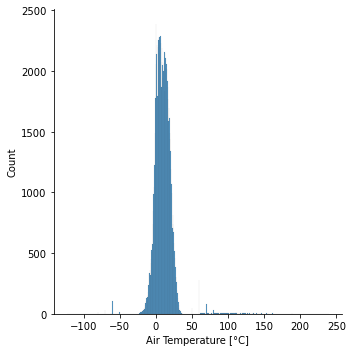

In [32]:
# YOUR CODE HERE
#raise NotImplementedError()

data_weather_complete['Air Temperature [°C]'].describe()
import seaborn as sns
sns.displot(data=data_weather_complete, x='Air Temperature [°C]')
plt.show()

In [33]:
def handle_outliers(noisy_data):
    """
    Parameters
    --------
    noisy_data: data frame that contains outliers
    
    Returns
    --------
    cleaned_data: data frame with outliers
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    ## defining a function called 'outliers' which returns a list of indices of outliers
    def outlier_index(df):
        col = df['Air Temperature [°C]']
        Q1 = col.quantile(0.25)
        Q3 = col.quantile(0.75)
        IQR =  Q3-Q1

        lower_bound = (Q1-1.5*IQR)
        upper_bound = (Q3+1.5*IQR)

        ls = df.index[(col<lower_bound) | (col>upper_bound)]
        return ls
    
    def remove_outliers(df,outliers):
        df = df.drop(outliers)
        return df
    
    #  removing rows with outliers
    cleaned_data = remove_outliers(noisy_data,outlier_index(noisy_data))

    
    return cleaned_data
    
data_weather_cleaned = handle_outliers(data_weather_complete)

In [34]:
# hidden tests

In [35]:
data_weather_cleaned

0                         Station code Station name  \
Year Month Week Day Hour                              
2011 1     52   1   0        351190465         ŁÓDŹ   
                    1        351190465         ŁÓDŹ   
                    2        351190465         ŁÓDŹ   
                    3        351190465         ŁÓDŹ   
                    4        351190465         ŁÓDŹ   
...                                ...          ...   
2010 12    52   31  18       351190465         ŁÓDŹ   
                    19       351190465         ŁÓDŹ   
                    20       351190465         ŁÓDŹ   
                    21       351190465         ŁÓDŹ   
                    22       351190465         ŁÓDŹ   

0                        Cloud base height CL CM encrypted [code]  \
Year Month Week Day Hour                                            
2011 1     52   1   0                                           3   
                    1                                           4   
                    2                                           4   
                    3                                           4   
                    4                                           4   
...                                                           ...   
2010 12    52   31  18                                          2   
                    19                                          2   
                    20                                          2   
                    21                                          2   
                    22                                          2   

0                         Lower cloud base height  [m]  \
Year Month Week Day Hour                                 
2011 1     52   1   0                            270.0   
                    1                            330.0   
                    2                            300.0   
                    3                            330.0   
                    4                            400.0   
...                                                ...   
2010 12    52   31  18                            90.0   
                    19                            90.0   
                    20                            90.0   
                    21                            90.0   
                    22                            90.0   

0                         Measurement status HPON  \
Year Month Week Day Hour                            
2011 1     52   1   0                         0.0   
                    1                         0.0   
                    2                         0.0   
                    3                         0.0   
                    4                         0.0   
...                                           ...   
2010 12    52   31  18                        8.0   
                    19                        8.0   
                    20                        8.0   
                    21                        8.0   
                    22                        8.0   

0                         Higher cloud base height [m]  \
Year Month Week Day Hour                                 
2011 1     52   1   0                              NaN   
                    1                              NaN   
                    2                              NaN   
                    3                              NaN   
                    4                              NaN   
...                                                ...   
2010 12    52   31  18                          1430.0   
                    19                          1430.0   
                    20                          1430.0   
                    21                          1430.0   
                    22                          1430.0   

0                         Measurement status HPOW  \
Year Month Week Day Hour                            
2011 1     52   1   0                         8.0   
                    1      

In [36]:
# hidden tests

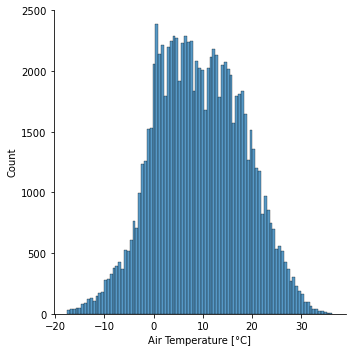

In [37]:
sns.displot(data=data_weather_cleaned, x='Air Temperature [°C]')
plt.show()

In [38]:
data_weather.shape, data_weather_complete.shape, data_weather_cleaned.shape

((96432, 104), (96432, 83), (95119, 83))

In [39]:
# hidden tests

#### Your chosen strategy

In the cell below, explain your chosen strategy for dealing with outliers.


**Ans:** The distribution for air temperature column was checked and everything below 25%quantile and above 75%quantile was removed.

## Task 4: Aggregate values
Total number of points for completing this task: **5**

Aggregate the observations on a weekly basis. Return a data frame with a hierarchical index (levels `year` and `week`) on the vertical axis and the following weekly aggregations as columns:

- `temp_weeklyMin`: minimum of `Air Temperature [°C]`
- `temp_weeklyMax`: <span style="color:red">max</span> of `Air Temperature [°C]`
- `temp_weeklyMean`: mean of `Air Temperature [°C]`
- `temp_weeklyMedian`: median of `Air Temperature [°C]`


- `precip_weeklyMin`: min of `Precipitation past 6 hours [mm]`
- `precip_weeklyMax`: max of `Precipitation past 6 hours [mm]`
- `precip_weeklyMean`: mean of `Precipitation past 6 hours [mm]`


- `hum_weeklyMin`: min of `Relative humidity [%]`
- `hum_weeklyMax`: max of `Relative humidity [%]`
- `hum_weeklyMean`: mean of `Relative humidity [%]`


- `wind_weeklyMean`: mean of `Wind speed  [m/s]`
- `wind_weeklyMax`: max of `Wind speed  [m/s]`
- `gust_weeklyMax`: max of `Wind gust  [m/s]`


**Note:** You can create more aggregation columns (for extra points), as depending on selected algorithm, other features might be more informative for prediction.

**Note2:** Attentive data scientists might have noticed a problem with isocalendars when aggregating on `Year` and `Week`. You can ignore this for the purpose of this lecture. In real-world settings you might consider addressing this issue, depending on your task and data

In [40]:
def aggregate_weekly(data):
    """ 
    Parameters
    --------
    data: weather data frame
    
    Returns
    --------
    weekly_stats: data frame that contains statistics aggregated on a weekly basis
    """
    weekly_weather_data = pd.DataFrame()
    # YOUR CODE HERE
    #raise NotImplementedError()
    weekly_weather_data = pd.DataFrame()
    
    weekly_weather_data['temp_weeklyMin']=data_weather_cleaned.groupby(['Year','Week'])['Air Temperature [°C]'].min()
    weekly_weather_data['temp_weeklyMax']=data_weather_cleaned.groupby(['Year','Week'])['Air Temperature [°C]'].max()
    weekly_weather_data['temp_weeklyMean']=data_weather_cleaned.groupby(['Year','Week'])['Air Temperature [°C]'].mean()
    weekly_weather_data['temp_weeklyMedian']=data_weather_cleaned.groupby(['Year','Week'])['Air Temperature [°C]'].median()
    
    weekly_weather_data['precip_weeklyMin']=data_weather_cleaned.groupby(['Year','Week'])['Precipitation past 6 hours [mm]'].min()
    weekly_weather_data['precip_weeklyMax']=data_weather_cleaned.groupby(['Year','Week'])['Precipitation past 6 hours [mm]'].max()
    weekly_weather_data['precip_weeklyMean']=data_weather_cleaned.groupby(['Year','Week'])['Precipitation past 6 hours [mm]'].mean()

    
    weekly_weather_data['hum_weeklyMin']=data_weather_cleaned.groupby(['Year','Week'])['Relative humidity [%]'].min()
    weekly_weather_data['hum_weeklyMax']=data_weather_cleaned.groupby(['Year','Week'])['Relative humidity [%]'].max()
    weekly_weather_data['hum_weeklyMean']=data_weather_cleaned.groupby(['Year','Week'])['Relative humidity [%]'].mean()

    
    weekly_weather_data['gust_weeklyMax']=data_weather_cleaned.groupby(['Year','Week'])['Wind gust  [m/s]'].min()
    weekly_weather_data['wind_weeklyMax']=data_weather_cleaned.groupby(['Year','Week'])['Wind speed  [m/s]'].max()
    weekly_weather_data['wind_weeklyMean']=data_weather_cleaned.groupby(['Year','Week'])['Wind speed  [m/s]'].mean()


    return weekly_weather_data

data_weather_weekly = aggregate_weekly(data_weather_cleaned)

In [41]:
# hidden tests

In [42]:
data_weather_weekly

temp_weeklyMin  temp_weeklyMax  temp_weeklyMean  temp_weeklyMedian  \
Year Week                                                                       
2010 1              -11.6            -2.5        -6.192424              -6.10   
     2              -13.0            -2.3        -5.068072              -4.40   
     3              -17.6            -2.4        -8.626087              -9.40   
     4              -17.6             0.4        -7.634211              -7.50   
     5              -13.3             0.9        -4.161078              -3.50   
...                   ...             ...              ...                ...   
2020 48              -5.9             5.4        -0.185714               0.00   
     49              -2.5            11.0         2.216867               0.85   
     50              -0.8             4.7         1.936145               1.80   
     51              -3.3            10.3         3.949080               3.50   
     52              -5.3             7.3         1.437968               1.30   

           precip_weeklyMin  precip_weeklyMax  precip_weeklyMean  \
Year Week                                                          
2010 1                  0.0               3.7           0.538923   
     2                  0.0               2.7           0.243976   
     3                  0.0               0.4           0.037267   
     4                  0.0               3.0           0.396836   
     5                  0.0               3.2           0.356607   
...                     ...               ...                ...   
2020 48                 0.0               1.3           0.117857   
     49                 0.0               0.6           0.180422   
     50                 0.0               0.1           0.014445   
     51                 0.0               2.8           0.491922   
     52                 0.0               4.1           0.790371   

           hum_weeklyMin  hum_weeklyMax  hum_weeklyMean  gust_weeklyMax  \
Year Week                                                                 
2010 1              76.0           99.0       93.293939            0.00   
     2              85.0          100.0       95.451807            0.00   
     3              69.0           99.0       87.478261            4.65   
     4              51.0           98.0       79.646617            0.00   
     5              64.0          100.0       86.922156            0.00   
...                  ...            ...             ...             ...   
2020 48             62.0           98.0       88.613095            0.00   
     49             64.0           97.0       81.469880            3.10   
     50             76.0           98.0       92.361446            0.00   
     51             70.0           99.0       91.328221            0.00   
     52             58.0           99.0       83.537433            0.00   

           wind_weeklyMax  wind_weeklyMean  
Year Week                                   
2010 1                9.0         3.460606  
     2                8.0         3.614458  
     3               10.0         5.204969  
     4               10.0         5.338346  
     5               10.0         4.317365  
...                   ...              ...  
2020 48               5.0         2.553571  
     49               9.0         5.096386  
     50               5.0         2.265060  
     51               7.0         2.766871  
     52               8.0         3.449198  

[572 rows x 13 columns]

## Task 5: Merge influenza and weather datasets
Total number of points for completing this task: **5**

Merge the `data_weather_weekly` and `data_influenza` datasets. Beware that both datasets contain rows that do not appear in the other dataset.

In [43]:
def merge_data(weather_df, influenza_df):
    """ 
    Parameters
    --------
    weather_df: weekly weather data frame
    influenza_df: influenza data frame
    
    Returns
    --------
    merged_data: merged data frame that contains both weekly weather observations and prevalence of influence infections
    """
    # YOUR CODE HERE
    #raise NotImplementedError()

    merged_data = weather_df.merge(influenza_df, left_index=True, right_index=True)
    
    # Remove rows with all NaN values
    merged_data = merged_data.dropna(axis= 'rows', how = 'any', subset=['hum_weeklyMean','Influenza_cases'] )

    
    return merged_data

data_merged = merge_data(data_weather_weekly, data_influenza)


In [44]:
data_merged.shape

(336, 15)

In [45]:
# hidden tests

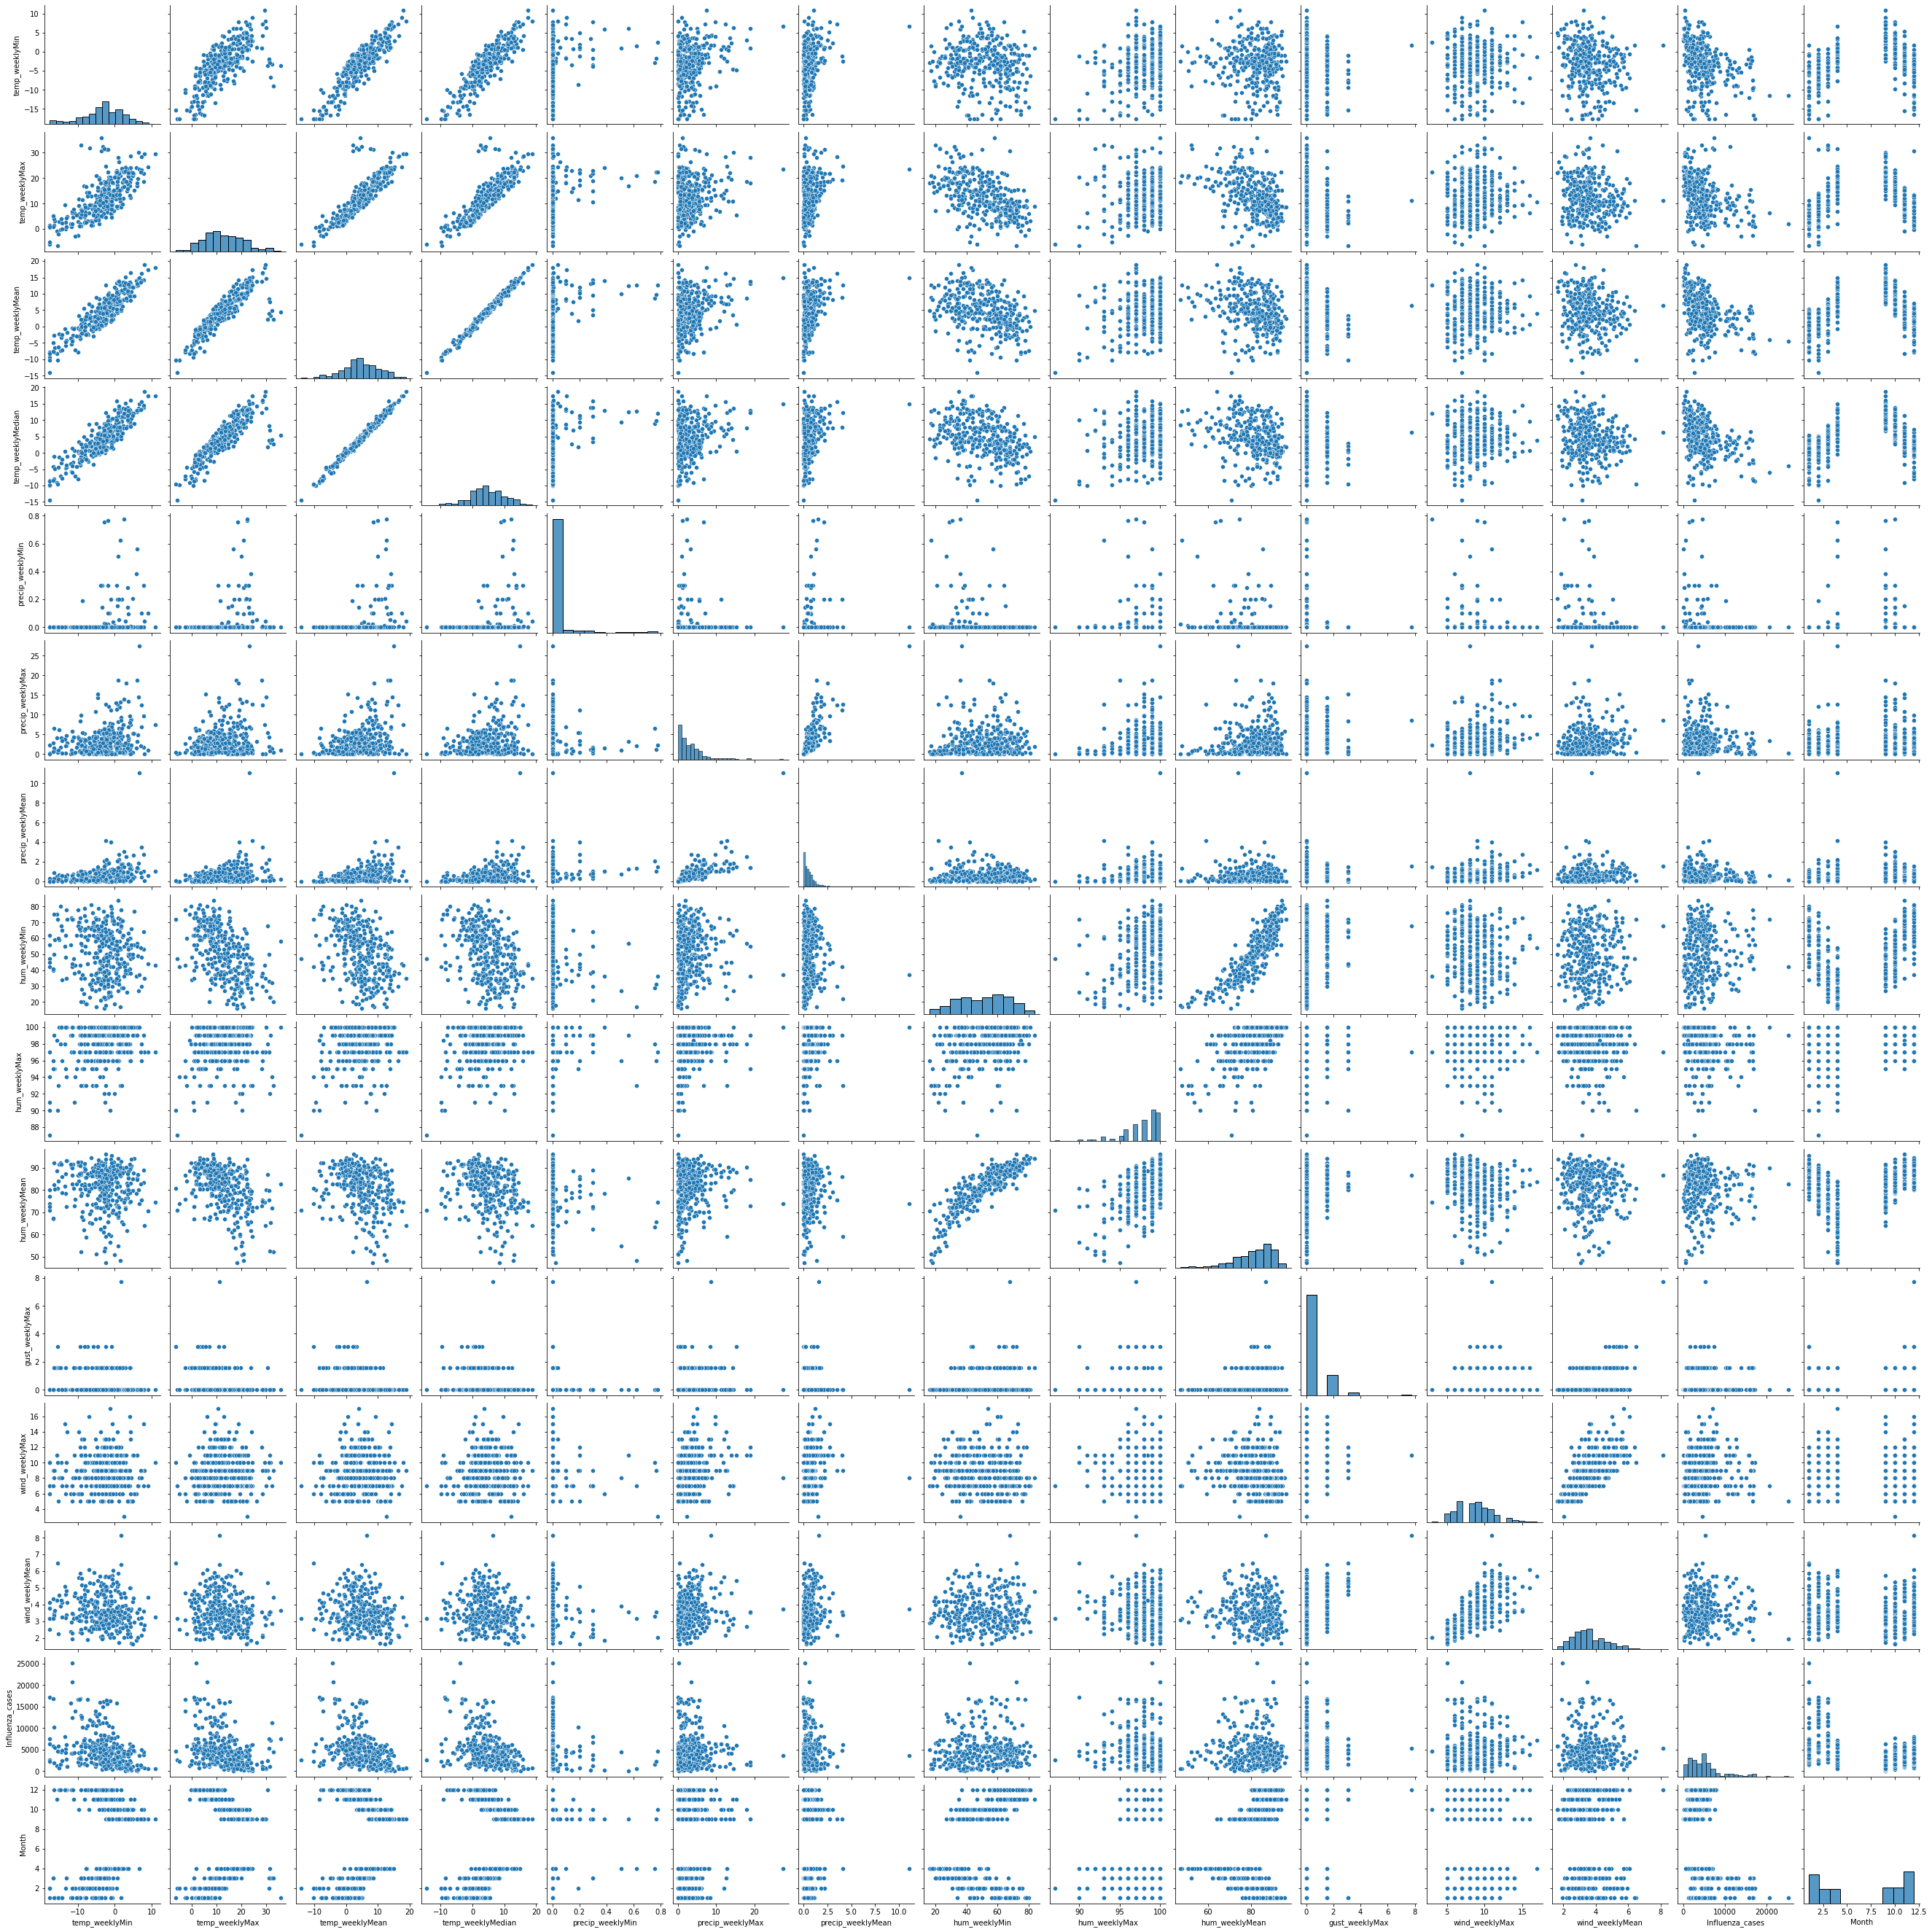

In [46]:
sns.pairplot(data_merged)
plt.show()

## Processed and merged data: shortcut for Tasks 6-8

If you encounter problems with the first five tasks, you can uncomment and use the following code to load pickled `DataFrame` containing already merged and preprocessed weather and influenza datasets. You can use this data to complete tasks 6-8. 

In [47]:
import pickle

with open("data/data_merged.pickle","rb") as fp:
    data_merged = pickle.load(fp)
data_merged

temp_weeklyMin  temp_weeklyMax  temp_weeklyMean  temp_weeklyMedian  \
Year Week                                                                       
2010 37               4.1            16.9        11.881250              12.50   
     38               3.4            22.9        13.733929              13.55   
     39               3.9            16.1         8.251786               7.85   
     40              -2.7            14.9         6.678274               6.30   
     41              -3.4            10.3         4.120833               4.00   
...                   ...             ...              ...                ...   
2020 48              -4.6             7.9         2.370833               2.70   
     49              -5.9            11.0         1.630952               0.60   
     50              -2.5             2.7         0.138988               0.40   
     51              -3.3             5.4         2.222917               2.45   
     52              -3.4            10.3         3.272321               3.00   

           hum_weeklyMin  hum_weeklyMax  hum_weeklyMean  precip_weeklyMin  \
Year Week                                                                   
2010 37             57.0           99.0       84.535714               0.0   
     38             40.0          100.0       75.821429               0.0   
     39             53.0           98.0       90.437500               0.0   
     40             43.0          100.0       75.208333               0.0   
     41             35.0          100.0       83.619048               0.0   
...                  ...            ...             ...               ...   
2020 48             60.0           98.0       86.660714               0.0   
     49             62.0           97.0       82.136905               0.0   
     50             74.0           98.0       89.077381               0.0   
     51             76.0           99.0       92.720238               0.0   
     52             58.0           97.0       86.202381               0.0   

           precip_weeklyMax  precip_weeklyMean  wind_weeklyMean  \
Year Week                                                         
2010 37                 3.3           0.081548         3.684524   
     38                 0.0           0.000000         3.404762   
     39                 8.7           0.202976         3.851190   
     40                 0.0           0.000000         5.154762   
     41                 1.3           0.010119         2.482143   
...                     ...                ...              ...   
2020 48                 1.3           0.020238         2.970238   
     49                 0.0           0.000000         3.720238   
     50                 0.6           0.005952         3.952381   
     51                 0.0           0.000000         2.041667   
     52                 2.8           0.060714         3.482143   

           wind_weeklyMax  gust_weeklyMax  Influenza_cases  Month  
Year Week                                                          
2010 37                11              19             16.0      9  
     38                 7              10            125.0      9  
     39                 8               9            192.0      9  
     40                10              15            335.0      9  
     41                 6               0            342.0     10  
...                   ...             ...              ...    ...  
2020 48                 8               0           4812.0     11  
     49                 9              13           4105.0     12  
     50                 8              13           4052.0     12  
     51                 4               0           2058.0     12  
     52                 7              12           2938.0     12  

[336 rows x 15 columns]

In [48]:
missing_values_table(data_merged)

Selected dataframe has 15 columns and 336 rows.
0 columns have NaN values.
0 columns have all NaN values.

Displaying columns having NaN values


Empty DataFrame
Columns: [#NaN, % NaN, Data Type]
Index: []

## Task 6: Visualization
Total number of points for completing this task: **15**

To better understand the dataset, create visualisations of the merged data using `matplotlib` that help explore potential relationships between the variables before developing a model.


**Note:** Hand in multiple figures. Use a proper naming configuration for the image files. Your plots should present information clearly (i.e. include titles, axis labels, legends,.. -> http://imgs.xkcd.com/comics/convincing.png). You should also describe which insights you gained from the figures.

**Note 2:** Choice of a proper chart type is essential. Points might be subtracted when using inappropriate plots and descriptions, so please *do not* just use all possible plotting functions from `matplotlib` without understanding and justification.

**Note 3:** You can also use `pandas` and `seaborn` python packages to create the plots.

In [49]:
# YOUR CODE HERE
#aise NotImplementedError()
print(data_merged.shape)
#missing_values_table(data_merged)
data_merged.info()



(336, 15)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 336 entries, (2010, 37) to (2020, 52)
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp_weeklyMin     336 non-null    float64
 1   temp_weeklyMax     336 non-null    float64
 2   temp_weeklyMean    336 non-null    float64
 3   temp_weeklyMedian  336 non-null    float64
 4   hum_weeklyMin      336 non-null    float64
 5   hum_weeklyMax      336 non-null    float64
 6   hum_weeklyMean     336 non-null    float64
 7   precip_weeklyMin   336 non-null    float64
 8   precip_weeklyMax   336 non-null    float64
 9   precip_weeklyMean  336 non-null    float64
 10  wind_weeklyMean    336 non-null    float64
 11  wind_weeklyMax     336 non-null    int64  
 12  gust_weeklyMax     336 non-null    int64  
 13  Influenza_cases    336 non-null    float64
 14  Month              336 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 41.8 KB


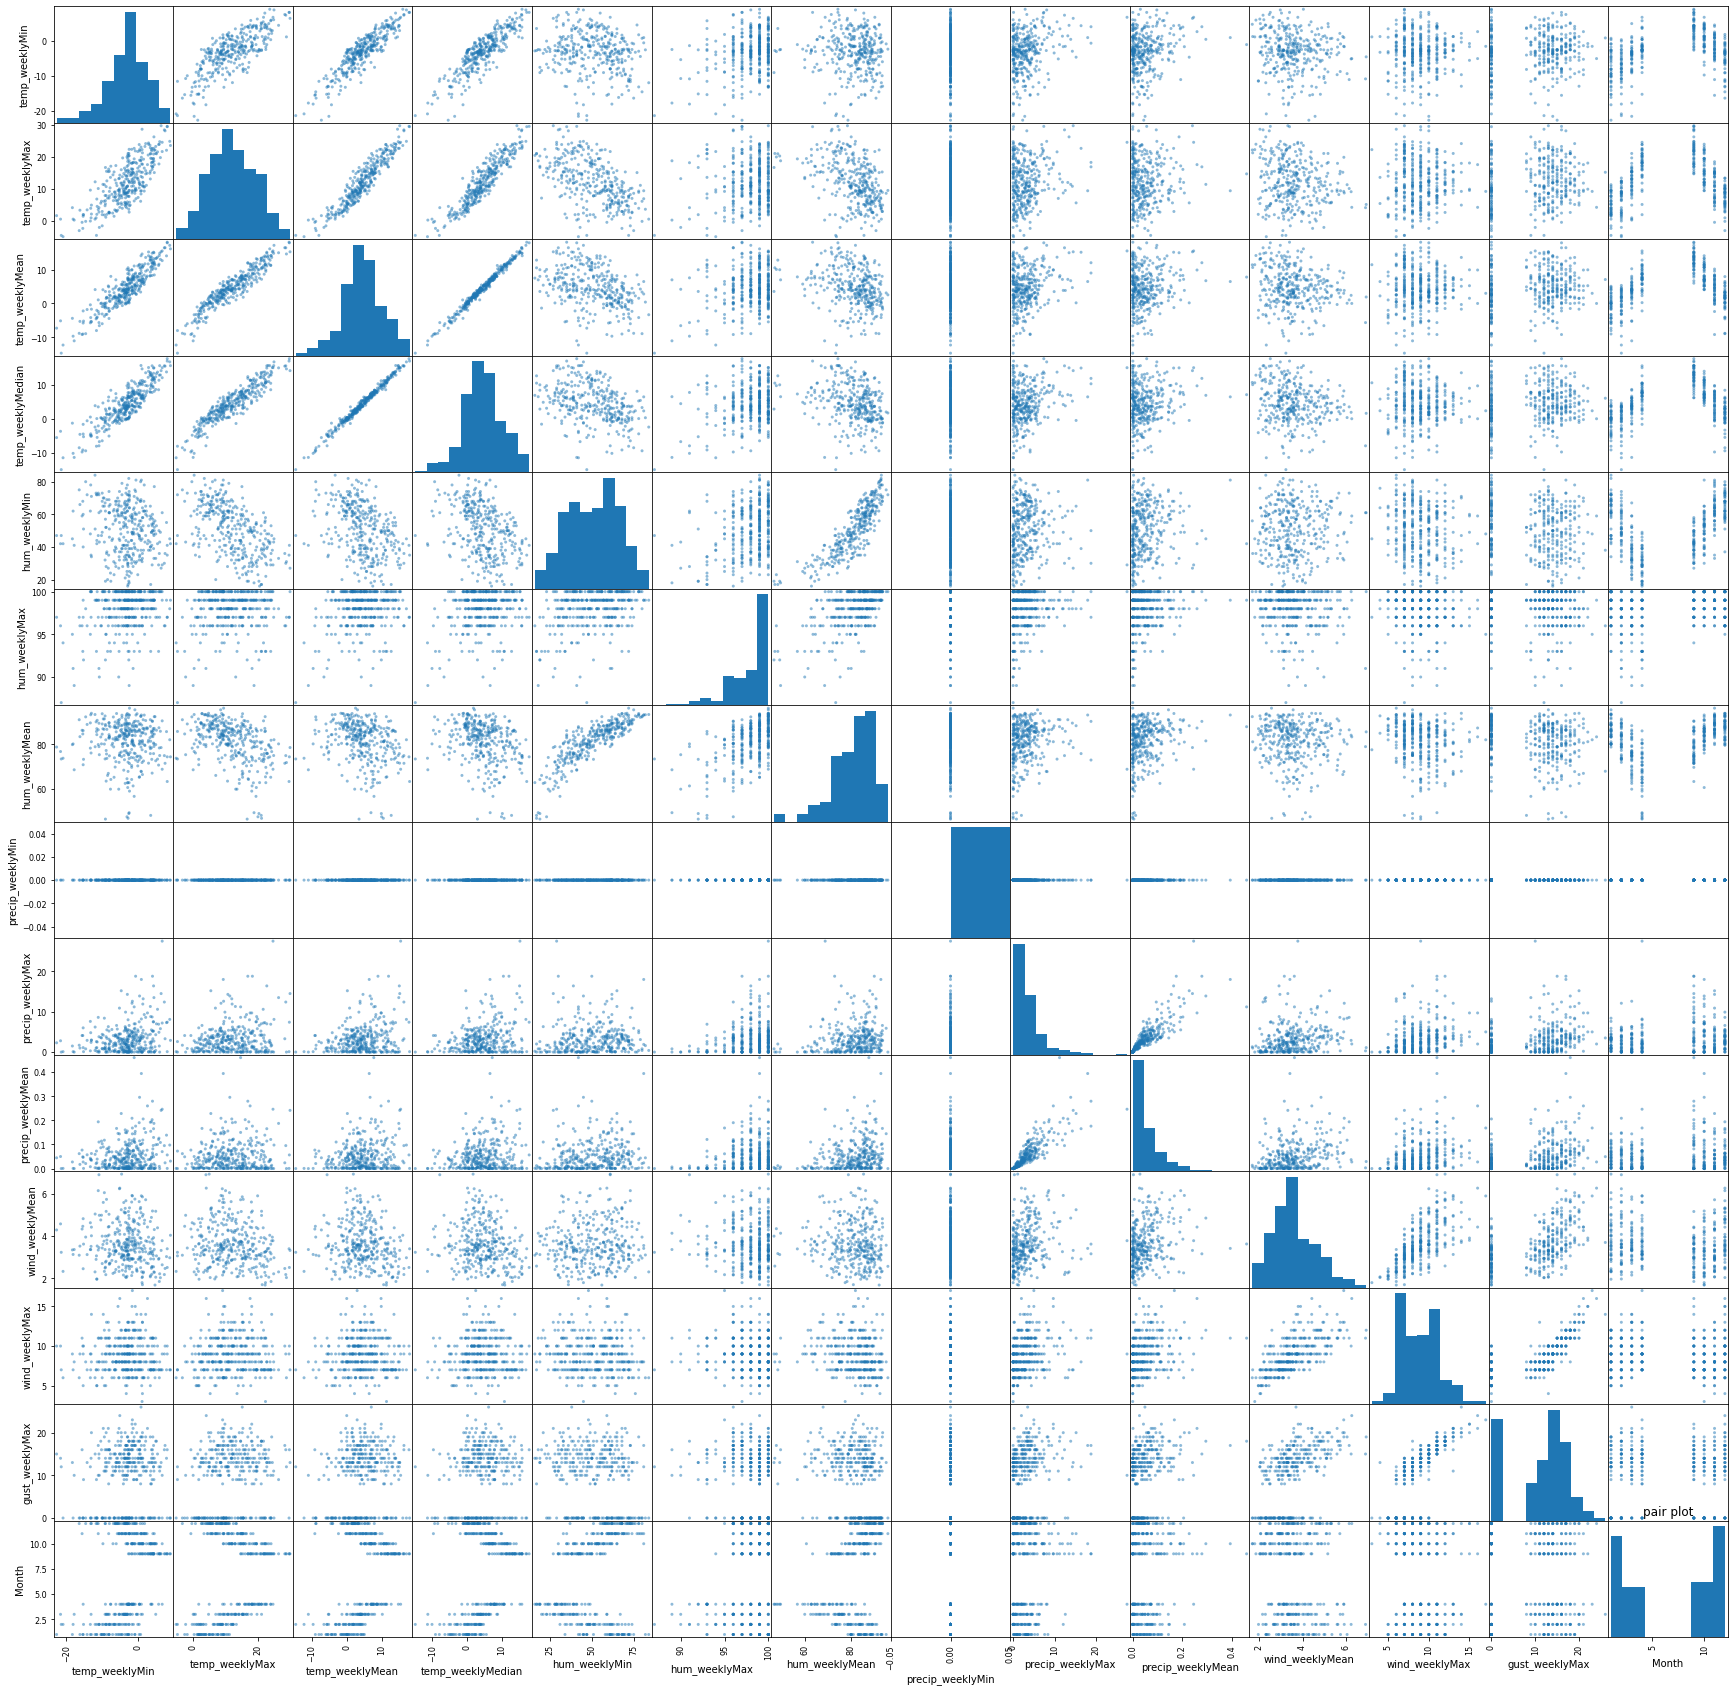

In [50]:
#sns.pairplot(data_merged.drop('Influenza_cases',axis=1),height = 5)

pd.plotting.scatter_matrix(data_merged.drop('Influenza_cases',axis=1), figsize = (30, 30))
plt.title("pair plot")
plt.show()

#### Visualization using sns pair plot

**Ans:**  Sns pair plot shows the bivariate relationship between each pair of the features. From the pair plot, we see that temp_min, temp_max, temp_Mean and temp_median are highly correlated as the corresponding pair plots are almost linear.

In [51]:
# hidden tests

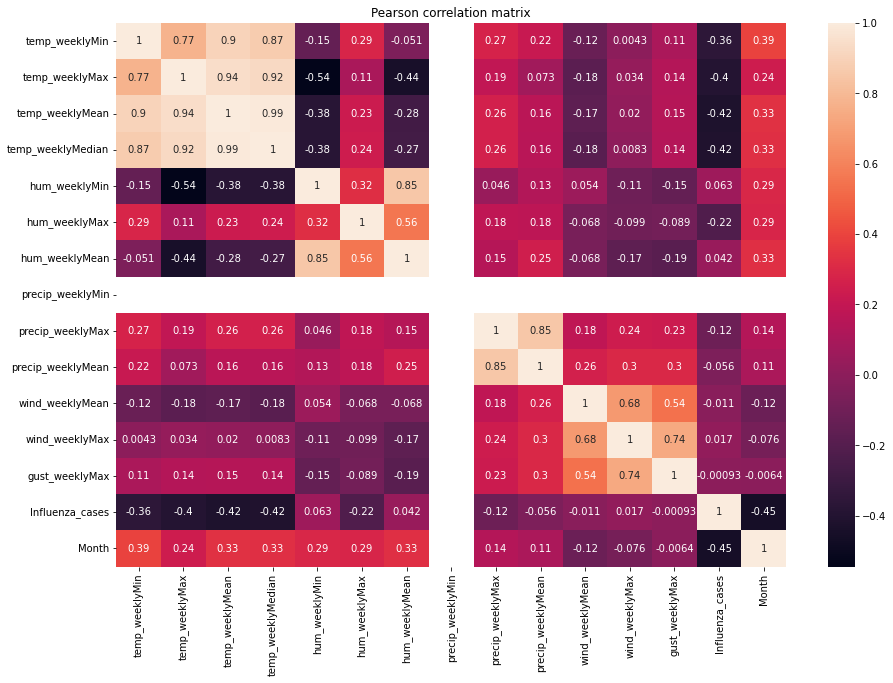

In [52]:
# To find the correlation among the columns using pearson method
corrMatrix = data_merged.corr(method ='pearson')
plt.figure(figsize= (15,10))
sns.heatmap(corrMatrix, annot=True)
plt.title("Pearson correlation matrix")
plt.show()

#### Visualization using heatmap correlation

**Ans:**  Heatmap shows the variance across multple variables, revealing  any patterns. displaying whether any variables are similar and detecting correlations between them.

In [53]:
corrMatrix

temp_weeklyMin  temp_weeklyMax  temp_weeklyMean  \
temp_weeklyMin           1.000000        0.771412         0.899321   
temp_weeklyMax           0.771412        1.000000         0.939891   
temp_weeklyMean          0.899321        0.939891         1.000000   
temp_weeklyMedian        0.872595        0.924278         0.992979   
hum_weeklyMin           -0.146222       -0.544678        -0.379542   
hum_weeklyMax            0.285779        0.106567         0.228294   
hum_weeklyMean          -0.050904       -0.442126        -0.278593   
precip_weeklyMin              NaN             NaN              NaN   
precip_weeklyMax         0.273428        0.186386         0.258493   
precip_weeklyMean        0.215576        0.072570         0.161363   
wind_weeklyMean         -0.122654       -0.178072        -0.168296   
wind_weeklyMax           0.004290        0.033713         0.020234   
gust_weeklyMax           0.111048        0.138913         0.146559   
Influenza_cases         -0.359196       -0.397588        -0.420314   
Month                    0.394117        0.236104         0.331690   

                   temp_weeklyMedian  hum_weeklyMin  hum_weeklyMax  \
temp_weeklyMin              0.872595      -0.146222       0.285779   
temp_weeklyMax              0.924278      -0.544678       0.106567   
temp_weeklyMean             0.992979      -0.379542       0.228294   
temp_weeklyMedian           1.000000      -0.377673       0.238771   
hum_weeklyMin              -0.377673       1.000000       0.318912   
hum_weeklyMax               0.238771       0.318912       1.000000   
hum_weeklyMean             -0.272703       0.850722       0.555302   
precip_weeklyMin                 NaN            NaN            NaN   
precip_weeklyMax            0.258448       0.045583       0.184812   
precip_weeklyMean           0.159634       0.132721       0.178162   
wind_weeklyMean            -0.182660       0.053805      -0.068352   
wind_weeklyMax              0.008285      -0.107827      -0.098819   
gust_weeklyMax              0.139416      -0.145073      -0.088860   
Influenza_cases            -0.416182       0.062775      -0.223554   
Month                       0.329812       0.290504       0.286119   

                   hum_weeklyMean  precip_weeklyMin  precip_weeklyMax  \
temp_weeklyMin          -0.050904               NaN          0.273428   
temp_weeklyMax          -0.442126               NaN          0.186386   
temp_weeklyMean         -0.278593               NaN          0.258493   
temp_weeklyMedian       -0.272703               NaN          0.258448   
hum_weeklyMin            0.850722               NaN          0.045583   
hum_weeklyMax            0.555302               NaN          0.184812   
hum_weeklyMean           1.000000               NaN          0.147842   
precip_weeklyMin              NaN               NaN               NaN   
precip_weeklyMax         0.147842               NaN          1.000000   
precip_weeklyMean        0.246772               NaN          0.853590   
wind_weeklyMean         -0.068208               NaN          0.181664   
wind_weeklyMax          -0.165765               NaN          0.236872   
gust_weeklyMax          -0.185711               NaN          0.230626   
Influenza_cases          0.042345               NaN         -0.115328   
Month                    0.326387               NaN          0.139845   

                   precip_weeklyMean  wind_weeklyMean  wind_weeklyMax  \
temp_weeklyMin              0.215576        -0.122654        0.004290   
temp_weeklyMax              0.072570        -0.178072        0.033713   
temp_weeklyMean             0.161363        -0.168296        0.020234   
temp_weeklyMedian           0.159634        -0.182660        0.008285   
hum_weeklyMin               0.132721         0.053805       -0.107827   
hum_weeklyMax               0.178162        -0.068352       -0.098819   
hum_weeklyMean              0.246772        -0.068208       -0.165765   
precip_weeklyMin        

<Figure size 432x288 with 0 Axes>

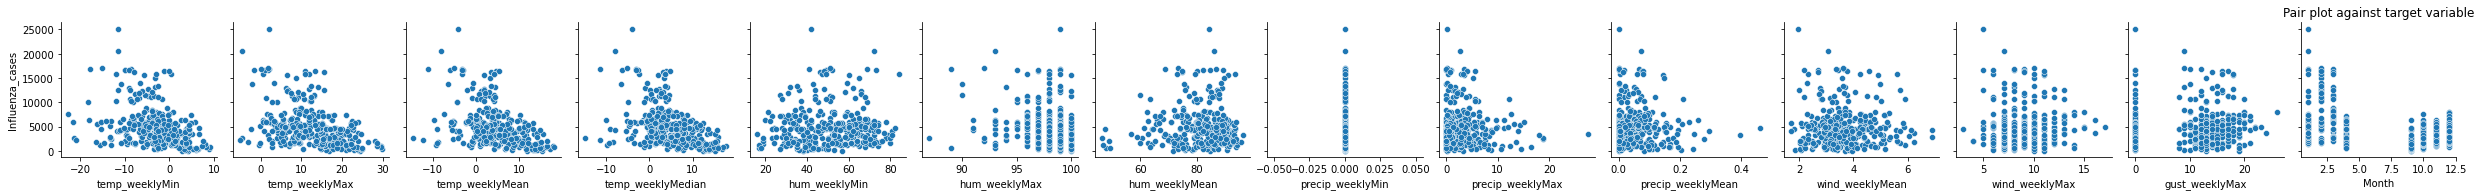

In [54]:
# pair plot against the target variable
plt.figure()
sns.pairplot(data_merged,
                  y_vars=['Influenza_cases'],
                  x_vars= data_merged.drop('Influenza_cases',axis=1).columns)
plt.title('Pair plot against target variable')
plt.show()

#### Findings 
Summarize your findings.

**Pair plot:** Pair plot shows the bivariate relationship between each pair of the features. From the pair plot, we see that temp_min, temp_max, temp_Mean and temp_median are highly correlated as the corresponding pair plots are almost linear.

**Correlation matrix:** Heatmap shows the variance across multple feature variables displaying whether any variables are similar and detecting correlations between them. Similar to pair plot, we see that temp_min, temp_max, temp_Mean and temp_median are grouped as similar color implying that they are highly correlated.

**Pair plot against target variable:** This plot shows that none of the features have linear relation with the target variable. Features such as hum_max,precip_min, wind_max, gust_max and month are highly uncorrelated with the target varible, ie, we cannot deduce anything about the number of influenza cases by looking at the corresponding plots.



## Task 7: Influenza prediction model 
Total number of points for completing this task: **20**


Build and train a model using weather and influenza data from 2010 until 2020 using `scikit-learn`.

Please structure and document your code so that it is easy to follow.

 - Choose appropriate machine learning algorithm(s) for the problem at hand
 - Experiment with different features and feature selection methods
 - Make sure your results are reproducible
 - Don't hesitate to go back to previous steps if you notice any data quality issues
 - If your chosen algorithm has specific parameters, explore their effect with different settings using 10-fold cross-validation
 - Experiment with different training/test splits
 - If appropriate, try different scaling approaches (min/max, z-score,..).
 - Present your results (e.g. by plotting predicted against true values)
 
 
 - How good does your model fit when you evaluate it with the validation data set?

In [55]:
class_df = data_merged.drop(['Month'], axis=1)

In [56]:
# Experiment with different features and feature selection methods
#cor = data_merged.corr(method="spearman")
cor = class_df.corr()
#Correlation with output variable
cor_target = abs(cor["Influenza_cases"])
cor_target

temp_weeklyMin       0.359196
temp_weeklyMax       0.397588
temp_weeklyMean      0.420314
temp_weeklyMedian    0.416182
hum_weeklyMin        0.062775
hum_weeklyMax        0.223554
hum_weeklyMean       0.042345
precip_weeklyMin          NaN
precip_weeklyMax     0.115328
precip_weeklyMean    0.055677
wind_weeklyMean      0.010799
wind_weeklyMax       0.017260
gust_weeklyMax       0.000928
Influenza_cases      1.000000
Name: Influenza_cases, dtype: float64

** Here we see the correlation of independent variables with the output variable Influenza_cases. In the following, we will only select features which has correlation of above 0.3 (taking absolute value) with the output variable.

** The correlation coefficient has values between -1 to 1

** — A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

** — A value closer to 1 implies stronger positive correlation

** — A value closer to -1 implies stronger negative correlation

In [57]:
#Selecting highly correlated features with the inlfuenza cases
relevant_features = cor_target[cor_target>0.3]
relevant_features

temp_weeklyMin       0.359196
temp_weeklyMax       0.397588
temp_weeklyMean      0.420314
temp_weeklyMedian    0.416182
Influenza_cases      1.000000
Name: Influenza_cases, dtype: float64

In [58]:
corr_features = class_df[['temp_weeklyMin','temp_weeklyMax','temp_weeklyMean','temp_weeklyMedian']].corr()
corr_features

temp_weeklyMin  temp_weeklyMax  temp_weeklyMean  \
temp_weeklyMin           1.000000        0.771412         0.899321   
temp_weeklyMax           0.771412        1.000000         0.939891   
temp_weeklyMean          0.899321        0.939891         1.000000   
temp_weeklyMedian        0.872595        0.924278         0.992979   

                   temp_weeklyMedian  
temp_weeklyMin              0.872595  
temp_weeklyMax              0.924278  
temp_weeklyMean             0.992979  
temp_weeklyMedian           1.000000

In [59]:
class_df_selected = class_df.drop(['temp_weeklyMin','temp_weeklyMax','temp_weeklyMedian', 'hum_weeklyMin','hum_weeklyMax', 'hum_weeklyMean','precip_weeklyMin','precip_weeklyMax','precip_weeklyMean', 'wind_weeklyMean', 'wind_weeklyMax', 'gust_weeklyMax'],axis = 1)
class_df_selected 

temp_weeklyMean  Influenza_cases
Year Week                                  
2010 37          11.881250             16.0
     38          13.733929            125.0
     39           8.251786            192.0
     40           6.678274            335.0
     41           4.120833            342.0
...                    ...              ...
2020 48           2.370833           4812.0
     49           1.630952           4105.0
     50           0.138988           4052.0
     51           2.222917           2058.0
     52           3.272321           2938.0

[336 rows x 2 columns]

In [60]:
#class_df = class_df_selected

In [61]:
# YOUR CODE HERE
#raise NotImplementedError()
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [62]:
#predictors = class_df.drop(['Influenza_cases','Month'], axis=1)
predictors = class_df.drop(['Influenza_cases'], axis=1)
target = class_df["Influenza_cases"]

In [63]:
cv_k = 10 #number of cross validation

In [64]:
# step 1: train, validation slplit
xtrain, xtest, ytrain, ytest = train_test_split(predictors, target, test_size=0.2, random_state=50, shuffle = True)

In [65]:
from sklearn.neighbors import KNeighborsRegressor

def regressor_KNN(Xhyper, yhyper, Xt, yt, normalized=False):
    
    if normalized:
        Xhyper = scaler2.fit_transform(Xhyper)
        Xt = scaler2.fit_transform(Xt)
        print("-----------------------------Performance of kNN on normalized dataset----------------------")
    else:
        print("---------------------Performance of kNN on original (not normalized) dataset---------------")
        
    # step 1: find best hyperparameters using gridsearch
    # 1.1 set values of parameters for KNN
    param_grid_search = {"n_neighbors": [1, 2, 4, 6, 8, 10],
                         "weights": ["uniform", "distance"],
                         "algorithm": ["ball_tree", "kd_tree", "brute", "auto"],
                         "p": [1, 2, 5, 10]}

    gsc = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid_search, cv=cv_k)
    grid_result = gsc.fit(Xhyper, yhyper)
    grid_result_df = pd.DataFrame(grid_result.cv_results_)
    #print(grid_result_df)

    # 1.2 make plots of grid search results
    params_to_plot = ['param_n_neighbors', 'param_weights', 'param_algorithm', 'param_p']

    _, axs = plt.subplots(1, 4, figsize=(22, 3))
    axs = axs.flatten()
    for p, ax in zip(params_to_plot, axs):
        ax.plot(grid_result_df.loc[:, [p, "mean_test_score"]].groupby(p).mean(), marker="o")
        ax.set_ylabel("mean cv score")
        ax.set_xlabel(p)
        ax.grid(linestyle="--", alpha=0.5)
    #plt.tight_layout()
    plt.show()
    
    # plot test scores for each hyper parameter combination
    plt.figure(figsize=(16, 4))
    plt.subplot(1,3,1)
    plt.plot(grid_result_df.loc[:, ['mean_test_score']].sum(axis=1).sort_values().values, marker=".",
             linestyle="")
    # plt.ylim(-1.5, 1.5)
    plt.ylabel("mean cv score")
    plt.grid(linestyle="--", alpha=0.5)
    plt.xlabel("parameter combination")
    plt.title("mean cv score for all chosen parameter combination")
    #plt.tight_layout()
    #plt.show()
    
    # run KNN with the best combination of parameters (from gridsearch)
    best_params_KNN = grid_result.best_params_
    print('Best combination:', best_params_KNN)
    best_knn = KNeighborsRegressor(n_neighbors=best_params_KNN["n_neighbors"], algorithm=best_params_KNN["algorithm"],
                                   p=best_params_KNN["p"], weights=best_params_KNN["weights"])

    best_score_knn = cross_val_score(best_knn, Xhyper, yhyper, cv=cv_k)
    # plot cv scores for each iteration for best hyperparameter combination
    plt.subplot(1,3,2)
    i = np.arange(1,cv_k+1,1)
    plt.plot(i,np.sort(best_score_knn), marker="o", linestyle=":", color="red", alpha=.75)
    plt.ylabel("cv score")
    plt.grid(linestyle="--", alpha=0.5)
    plt.xlabel("iteration#")
    plt.xticks(i,i)
    plt.title("cv score for best hyperparameter combination")
    #plt.tight_layout()
    #plt.show()
    
    # plot original vs prediction with best knn
    plt.subplot(1,3,3)
    ypred = cross_val_predict(best_knn, Xhyper, yhyper, cv=cv_k)
    plt.scatter(yhyper, ypred, edgecolors=(0, 0, 0))
    plt.plot([yhyper.min(), yhyper.max()], [yhyper.min(), yhyper.max()], "k--", lw=4)
    plt.xlabel('true')
    plt.ylabel('prediction')
    plt.title("KNN true vs predicted")
    plt.tight_layout()
    plt.show()
            
    # plot performance on validation dataset
    model = best_knn.fit(Xhyper, yhyper)
    ypred = model.predict(Xt)
    
    return ypred, best_score_knn, model, model.score(Xt,yt)
    

---------------------Performance of kNN on original (not normalized) dataset---------------


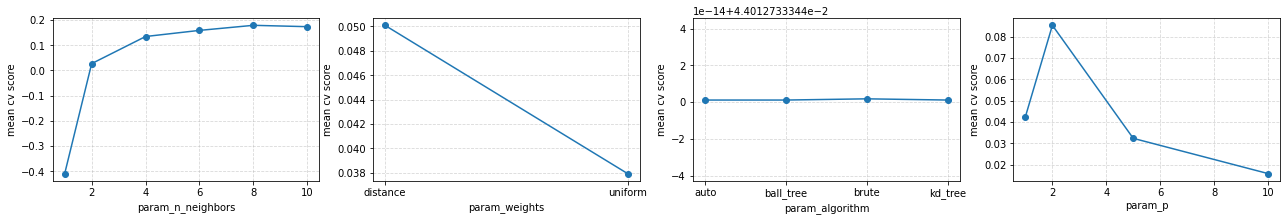

Best combination: {'algorithm': 'ball_tree', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}


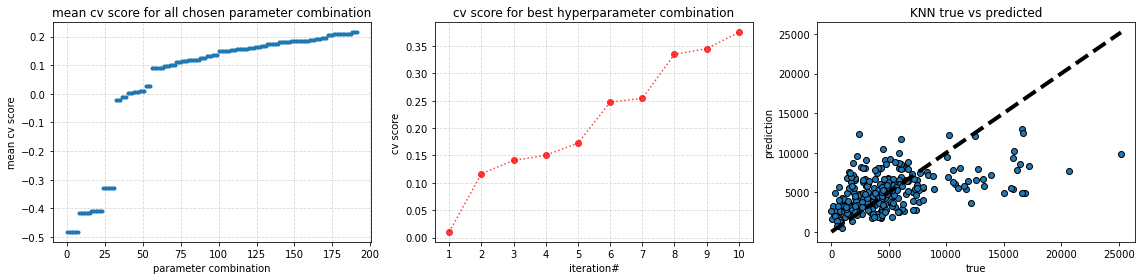

In [66]:
ypred_knn_orig, best_score_knn_orig, model_knn_orig, val_score_knn_orig = regressor_KNN(xtrain, ytrain, xtest, ytest) #original data

Figures on the top row indicate mean cv score for different hyperparamters with 10 fold CV obtained using knn model on the original dataset. Of all the parameters tested, the parameters having a larger impact on the  score are: n_neighbors, weights and p while different param_algorithm did not have an impact on the final score as it remained constant.

Figures on the bottom row indicate that accurate tuning of hyper parameters can lead to better results, as the score ranged from less than -0.5 up to 0.3.  

-----------------------------Performance of kNN on normalized dataset----------------------


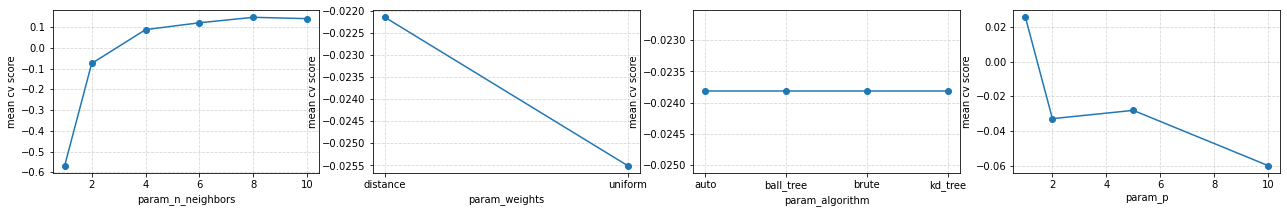

Best combination: {'algorithm': 'ball_tree', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}


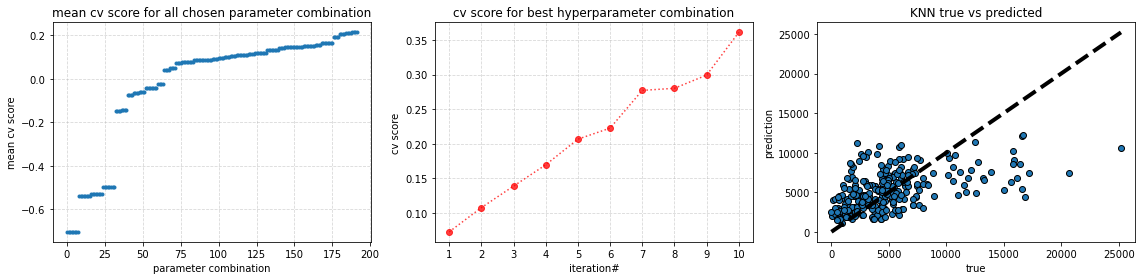

In [67]:
ypred_knn_norm, best_score_knn_norm, model_knn_norm, val_score_knn_norm = regressor_KNN(xtrain, ytrain, xtest, ytest,normalized=True) #normalized data

Figures on the top row indicate mean cv score for different hyperparamters with 10 fold CV obtained using knn model on the SCALED dataset. Of all the parameters tested, the parameters having a larger impact on the  score are: n_neighbors, weights and p while different param_algorithm did not have an impact on the final score as it remained constant.

Figures on the bottom row indicate that accurate tuning of hyper parameters can lead to better results, as the score ranged from less than -0.5 up to 0.3. 

In [68]:
from sklearn.linear_model import LinearRegression
def regressor_LR(Xhyper, yhyper, Xt, yt, normalized=False):
    
    if normalized: 
        #Xhyper = pd.DataFrame(preprocessing.normalize(Xhyper))
        #Xt = pd.DataFrame(preprocessing.normalize(Xt))
        Xhyper = scaler2.fit_transform(Xhyper)
        Xt = scaler2.fit_transform(Xt)
        #yhyper = scaler2.fit_transform(np.array(yhyper).reshape(-1, 1))
        #yt = scaler2.fit_transform(np.array(yt).reshape(-1, 1))
        # xtest = xtest_norm
        print("--------Performance of Linear Regression on normalized dataset----------")
    else:
        print("--Performance of Linear Regression on original (not normalized) dataset--")
    # step 1: find best hyperparameters using gridsearch
    # 1.1 set values of parameters for LR
    param_grid_search = {'fit_intercept':[True,False], 
                         'copy_X':[True, False]}
    gsc = GridSearchCV(LinearRegression(),
                       param_grid=param_grid_search, cv=cv_k)
    grid_result = gsc.fit(Xhyper, yhyper)
    grid_result_df = pd.DataFrame(grid_result.cv_results_)
    
    # 1.2 make plots of grid search results
    params_to_plot = ['param_fit_intercept', 'param_copy_X']

    _, axs = plt.subplots(1, 2, figsize=(22, 5))
    axs = axs.flatten()
    for p, ax in zip(params_to_plot, axs):
        ax.plot(grid_result_df.loc[:, [p, "mean_test_score"]].groupby(p).mean(), marker="o")
        ax.set_ylabel("mean cv score")
        ax.set_xlabel(p)
        ax.grid(linestyle="--", alpha=0.5)
    #plt.tight_layout()
    plt.show()
    
    # plot test scores for each hyper parameter combination
    plt.figure(figsize=(16, 4))
    plt.subplot(1,3,1)
    plt.plot(grid_result_df.loc[:, ['mean_test_score']].sum(axis=1).sort_values().values, marker=".",
             linestyle="")
    # plt.ylim(-1.5, 1.5)
    plt.ylabel("mean cv score")
    plt.grid(linestyle="--", alpha=0.5)
    plt.xlabel("parameter combination")
    plt.title("mean cv score for all chosen parameter combination")
    #plt.tight_layout()
    #plt.show()
    
    # run RF with the best combination of parameters (from gridsearch)
    best_params_LR = grid_result.best_params_
    print('Best combination:', best_params_LR)
    best_LR = LinearRegression(copy_X = best_params_LR["copy_X"],
                                      fit_intercept = best_params_LR["fit_intercept"])
    
    #plt.figure(figsize=(7,3))
    best_score_LR = cross_val_score(best_LR, Xhyper, yhyper, cv=cv_k)
    # plot cv scores for each iteration for best hyperparameter combination
    plt.subplot(1,3,2)
    i = np.arange(1,cv_k+1,1)
    plt.plot(i,np.sort(best_score_LR), marker="o", linestyle=":", color="red", alpha=.75)
    plt.ylabel("cv score")
    plt.grid(linestyle="--", alpha=0.5)
    plt.xlabel("iteration#")
    plt.xticks(i,i)
    plt.title("cv score")
    
    # plot original vs prediction with best RF
    plt.subplot(1,3,3)
    ypred = cross_val_predict(best_LR, Xhyper, yhyper, cv=cv_k)
    plt.scatter(yhyper, ypred, edgecolors=(0, 0, 0))
    plt.plot([yhyper.min(), yhyper.max()], [yhyper.min(), yhyper.max()], "k--", lw=4)
    plt.xlabel('true')
    plt.ylabel('prediction')
    plt.title("LR true vs predicted")
    plt.tight_layout()
    plt.show()
    
    # plot performance on validation dataset
    model = best_LR.fit(Xhyper, yhyper)
    ypred = model.predict(Xt)
    
    return ypred, best_score_LR, model, model.score(Xt,yt)
    

--Performance of Linear Regression on original (not normalized) dataset--


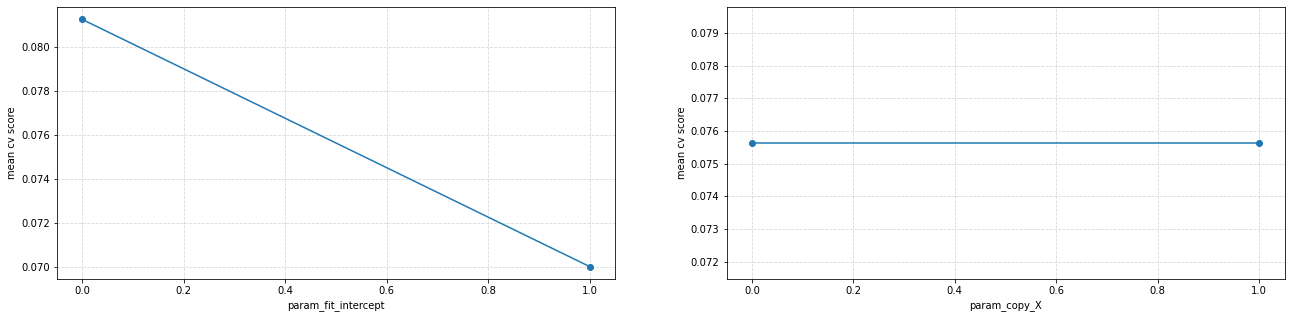

Best combination: {'copy_X': True, 'fit_intercept': False}


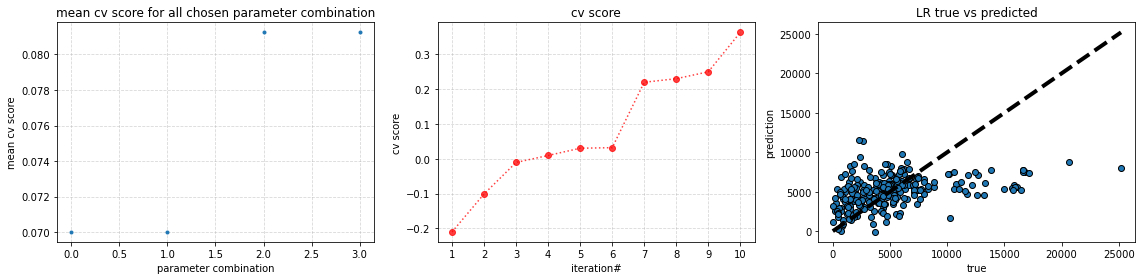

In [69]:
ypred_LR_orig, best_score_LR_orig, model_LR_orig, val_score_LR_orig = regressor_LR(xtrain, ytrain, xtest, ytest) #original data

Figures on the top row indicate mean cv score for different hyperparamters with 10 fold CV obtained using linear regression model on the original dataset. Of all the parameters tested, the parameters having a larger impact on the  score are: fit_intercept while copy_X did not have an impact on the final score as it remained constant.

Figures on the bottom row indicate that accurate tuning of hyper parameters can lead to better results.

--------Performance of Linear Regression on normalized dataset----------


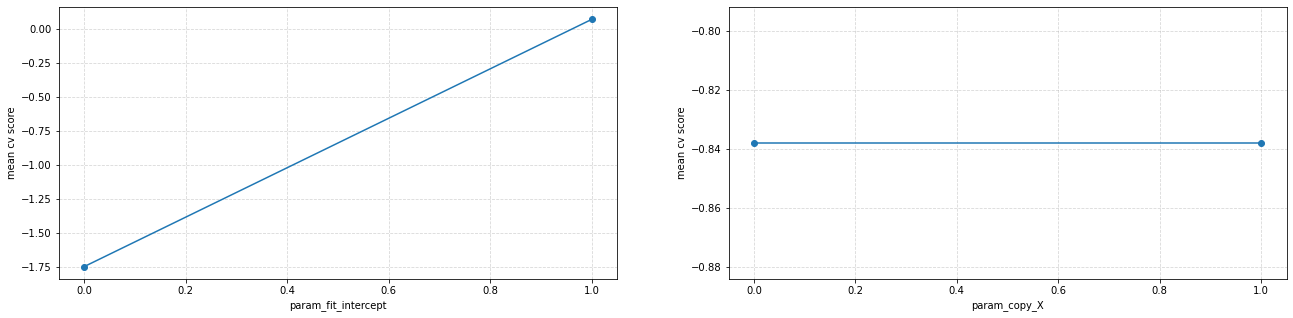

Best combination: {'copy_X': True, 'fit_intercept': True}


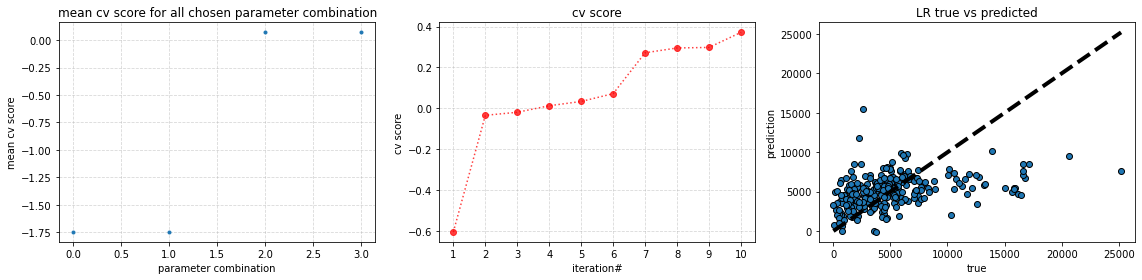

In [70]:
ypred_LR_norm, best_score_LR_norm,model_LR_norm, val_score_LR_norm = regressor_LR(xtrain, ytrain, xtest, ytest, normalized=True) #normalized data

Figures on the top row indicate mean cv score for different hyperparamters with 10 fold CV obtained using linear regression model on the scaled dataset. Of all the parameters tested, the parameters having a larger impact on the  score are: fit_intercept while copy_X did not have an impact on the final score as it remained constant.

Figures on the bottom row indicate that accurate tuning of hyper parameters can lead to better results.

###### Summarizing results of KNN and Linear Regression on validation dataset


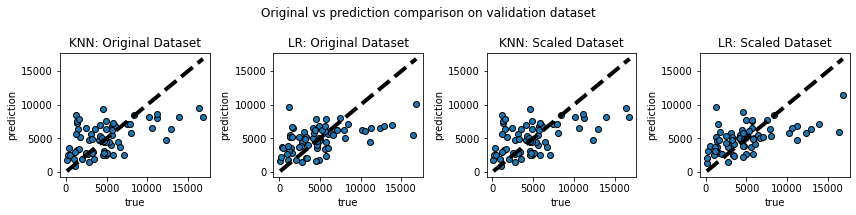

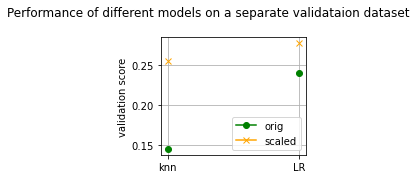

In [71]:
# plot original vs prediction with best RF
plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
plt.scatter(ytest, ypred_knn_norm, edgecolors=(0, 0, 0))
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--", lw=4)
plt.xlabel('true')
plt.ylabel('prediction')
plt.title("KNN: Original Dataset")
plt.subplot(1,4,2)
plt.scatter(ytest, ypred_LR_orig, edgecolors=(0, 0, 0))
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--", lw=4)
plt.xlabel('true')
plt.ylabel('prediction')
plt.title("LR: Original Dataset")
plt.subplot(1,4,3)
plt.scatter(ytest, ypred_knn_norm, edgecolors=(0, 0, 0))
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--", lw=4)
plt.xlabel('true')
plt.ylabel('prediction')
plt.title("KNN: Scaled Dataset")
plt.subplot(1,4,4)
plt.scatter(ytest, ypred_LR_norm, edgecolors=(0, 0, 0))
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--", lw=4)
plt.xlabel('true')
plt.ylabel('prediction')
plt.title("LR: Scaled Dataset")
plt.suptitle('Original vs prediction comparison on validation dataset')
plt.tight_layout()
plt.show()

plt.figure(figsize =(3,2.5))
plt.plot(0, val_score_knn_orig, marker = 'o' ,color = 'green', label = 'orig')
plt.plot(0, val_score_knn_norm, marker = 'x',color = 'orange', label = 'scaled')
plt.plot(1, val_score_LR_orig, marker = 'o',color = 'green')
plt.plot(1, val_score_LR_norm, marker = 'x',color = 'orange')
plt.grid()
plt.legend(loc = 'best')
plt.xticks([0,1],['knn','LR'])
plt.ylabel('validation score')
plt.suptitle('Performance of different models on a separate validataion dataset')
plt.tight_layout()
plt.show()

#### Approach and algorithm
Motivate your approach and choice of algorithm in the cell below

**Ans:** Two algorithms were tested. Since we have to predict discrete values (#infection casee), this is a regrerssion problem, hence knn regressor and linear regressor were chosen to create the model. We can see from the figure above that although the validation score for both the models is low, Linear Regression with scaling performs better than knn . Hence , linear regression with scaling (model_LR_norm) was chosen from above for the next task.

## Task 8: Test model on last weeks of 2020/2021 season
Total number of points for completing this task: **10**

Load weather data for corresponding `Station code` for <span style="color:red">January-April 2021</span> from `data/prediction/` and test the quality of your model with `data_influenza`.


**Note:** This data is encoded with 'Central European (Windows 1250)' encoding.

In [72]:
# YOUR CODE HERE
#raise NotImplementedError()
# YOUR CODE HERE
#raise NotImplementedError()
def load_prediction_data():
    """ 
    Load all weather data files and combi
    ne them into a single Pandas DataFrame.
    Add a week column and a hierarchical index (year, month, week, day)
    
    Returns
    --------
    prediction data
    : data frame containing the weather data
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    #return weather_data
    dir_prediction = r'data/prediction'
    weather_data_files = []
    for file in os.listdir(dir_prediction):
        path = os.path.join(dir_prediction,file)
        data = pd.read_csv(path,encoding= 'unicode_escape', header = None)
        weather_data_files.append(data)
    df = pd.concat(weather_data_files)
    #df.columns = pd.read_csv('data/weather/names.txt',header = None)

    col_names = pd.read_csv('data/weather/names.txt',low_memory=False,header = None).squeeze()

    df.columns = col_names
    
    date = []
    week = []

    for y,m,d,h in zip(df['Year'],df['Month'],df['Day'],df['Hour']):
        n = pd.Timestamp(year=y, month=m, day=d, hour=h)
        date.append(n)
        week.append(n.weekofyear)
    
    # create data and week column
    df['Date'] = pd.Series(date) 
    df['Week'] = pd.Series(week) 
    

    df.set_index(['Year', 'Month','Week','Day', 'Hour'],inplace = True)

    df = df[df['Station code']==int(data_weather['Station code'].unique())]
    

    return df
#loading prediction data
data_prediction = load_prediction_data()


In [73]:
data_prediction

0                         Station code   Station name  \
Year Month Week Day Hour                                
2021 3     9    1   0        351190465  £ÓD-LUBLINEK   
                    1        351190465  £ÓD-LUBLINEK   
                    2        351190465  £ÓD-LUBLINEK   
                    3        351190465  £ÓD-LUBLINEK   
                    4        351190465  £ÓD-LUBLINEK   
...                                ...            ...   
     2     10   28  19       351190465  £ÓD-LUBLINEK   
                    20       351190465  £ÓD-LUBLINEK   
                    21       351190465  £ÓD-LUBLINEK   
                    22       351190465  £ÓD-LUBLINEK   
                    23       351190465  £ÓD-LUBLINEK   

0                        Cloud base height CL CM encrypted [code]  \
Year Month Week Day Hour                                            
2021 3     9    1   0                                           4   
                    1                                           4   
                    2                                           3   
                    3                                           3   
                    4                                           3   
...                                                           ...   
     2     10   28  19                                          4   
                    20                                          4   
                    21                                          4   
                    22                                          4   
                    23                                          4   

0                         Measurement status HPOD  \
Year Month Week Day Hour                            
2021 3     9    1   0                         NaN   
                    1                         NaN   
                    2                         NaN   
                    3                         NaN   
                    4                         NaN   
...                                           ...   
     2     10   28  19                        NaN   
                    20                        NaN   
                    21                        NaN   
                    22                        NaN   
                    23                        NaN   

0                         Lower cloud base height  [m]  \
Year Month Week Day Hour                                 
2021 3     9    1   0                              350   
                    1                              310   
                    2                              280   
                    3                              270   
                    4                              290   
...                                                ...   
     2     10   28  19                             330   
                    20                             340   
                    21                             370   
                    22                             340   
                    23                             340   

0                         Measurement status HPON  \
Year Month Week Day Hour                            
2021 3     9    1   0                         NaN   
                    1                         NaN   
                    2                         NaN   
                    3                         NaN   
                    4                         NaN   
...                                           ...   
     2     10   28  19                        NaN   
                    20                        NaN   
                    21                        NaN   
                    22                        NaN   
                    23                        NaN   

0                         Higher cloud base height [m]  \
Year Month Week Day Hour                                 
2021 3     9    1   0                                0   
                    1                              

In [74]:
# handling missing values
data_prediction_complete = handle_missingValues_advanced(data_prediction)
# removing outliers based on air temperature
data_prediction_cleaned = handle_outliers(data_prediction_complete)
data_prediction_cleaned

0                         Station code   Station name  \
Year Month Week Day Hour                                
2021 3     9    1   0        351190465  £ÓD-LUBLINEK   
                    1        351190465  £ÓD-LUBLINEK   
                    2        351190465  £ÓD-LUBLINEK   
                    3        351190465  £ÓD-LUBLINEK   
                    4        351190465  £ÓD-LUBLINEK   
...                                ...            ...   
     2     10   28  19       351190465  £ÓD-LUBLINEK   
                    20       351190465  £ÓD-LUBLINEK   
                    21       351190465  £ÓD-LUBLINEK   
                    22       351190465  £ÓD-LUBLINEK   
                    23       351190465  £ÓD-LUBLINEK   

0                        Cloud base height CL CM encrypted [code]  \
Year Month Week Day Hour                                            
2021 3     9    1   0                                           4   
                    1                                           4   
                    2                                           3   
                    3                                           3   
                    4                                           3   
...                                                           ...   
     2     10   28  19                                          4   
                    20                                          4   
                    21                                          4   
                    22                                          4   
                    23                                          4   

0                         Lower cloud base height  [m]  \
Year Month Week Day Hour                                 
2021 3     9    1   0                            350.0   
                    1                            310.0   
                    2                            280.0   
                    3                            270.0   
                    4                            290.0   
...                                                ...   
     2     10   28  19                           330.0   
                    20                           340.0   
                    21                           370.0   
                    22                           340.0   
                    23                           340.0   

0                         Measurement status HPON  \
Year Month Week Day Hour                            
2021 3     9    1   0                         0.0   
                    1                         0.0   
                    2                         0.0   
                    3                         0.0   
                    4                         0.0   
...                                           ...   
     2     10   28  19                        0.0   
                    20                        0.0   
                    21                        0.0   
                    22                        0.0   
                    23                        0.0   

0                         Higher cloud base height [m]  \
Year Month Week Day Hour                                 
2021 3     9    1   0                              NaN   
                    1                              NaN   
                    2                              NaN   
                    3                              NaN   
                    4                              NaN   
...                                                ...   
     2     10   28  19                           930.0   
                    20                           930.0   
                    21                           930.0   
                    22                           930.0   
                    23                           930.0   

0                         Measurement status HPOW  \
Year Month Week Day Hour                            
2021 3     9    1   0                         8.0   
 

In [75]:
# handling missing values
data_prediction_complete = handle_missingValues_advanced(data_prediction)
# removing outliers based on air temperature
data_prediction_cleaned = handle_outliers(data_prediction_complete)
# aggregating weekly data
data_prediction_weekly = aggregate_weekly(data_prediction_cleaned)
data_prediction_weekly

temp_weeklyMin  temp_weeklyMax  temp_weeklyMean  temp_weeklyMedian  \
Year Week                                                                       
2010 1              -11.6            -2.5        -6.192424              -6.10   
     2              -13.0            -2.3        -5.068072              -4.40   
     3              -17.6            -2.4        -8.626087              -9.40   
     4              -17.6             0.4        -7.634211              -7.50   
     5              -13.3             0.9        -4.161078              -3.50   
...                   ...             ...              ...                ...   
2020 48              -5.9             5.4        -0.185714               0.00   
     49              -2.5            11.0         2.216867               0.85   
     50              -0.8             4.7         1.936145               1.80   
     51              -3.3            10.3         3.949080               3.50   
     52              -5.3             7.3         1.437968               1.30   

           precip_weeklyMin  precip_weeklyMax  precip_weeklyMean  \
Year Week                                                          
2010 1                  0.0               3.7           0.538923   
     2                  0.0               2.7           0.243976   
     3                  0.0               0.4           0.037267   
     4                  0.0               3.0           0.396836   
     5                  0.0               3.2           0.356607   
...                     ...               ...                ...   
2020 48                 0.0               1.3           0.117857   
     49                 0.0               0.6           0.180422   
     50                 0.0               0.1           0.014445   
     51                 0.0               2.8           0.491922   
     52                 0.0               4.1           0.790371   

           hum_weeklyMin  hum_weeklyMax  hum_weeklyMean  gust_weeklyMax  \
Year Week                                                                 
2010 1              76.0           99.0       93.293939            0.00   
     2              85.0          100.0       95.451807            0.00   
     3              69.0           99.0       87.478261            4.65   
     4              51.0           98.0       79.646617            0.00   
     5              64.0          100.0       86.922156            0.00   
...                  ...            ...             ...             ...   
2020 48             62.0           98.0       88.613095            0.00   
     49             64.0           97.0       81.469880            3.10   
     50             76.0           98.0       92.361446            0.00   
     51             70.0           99.0       91.328221            0.00   
     52             58.0           99.0       83.537433            0.00   

           wind_weeklyMax  wind_weeklyMean  
Year Week                                   
2010 1                9.0         3.460606  
     2                8.0         3.614458  
     3               10.0         5.204969  
     4               10.0         5.338346  
     5               10.0         4.317365  
...                   ...              ...  
2020 48               5.0         2.553571  
     49               9.0         5.096386  
     50               5.0         2.265060  
     51               7.0         2.766871  
     52               8.0         3.449198  

[572 rows x 13 columns]

In [76]:

#data_prediction_weekly = df.reset_index(level='Month')
data_prediction_weekly

temp_weeklyMin  temp_weeklyMax  temp_weeklyMean  temp_weeklyMedian  \
Year Week                                                                       
2010 1              -11.6            -2.5        -6.192424              -6.10   
     2              -13.0            -2.3        -5.068072              -4.40   
     3              -17.6            -2.4        -8.626087              -9.40   
     4              -17.6             0.4        -7.634211              -7.50   
     5              -13.3             0.9        -4.161078              -3.50   
...                   ...             ...              ...                ...   
2020 48              -5.9             5.4        -0.185714               0.00   
     49              -2.5            11.0         2.216867               0.85   
     50              -0.8             4.7         1.936145               1.80   
     51              -3.3            10.3         3.949080               3.50   
     52              -5.3             7.3         1.437968               1.30   

           precip_weeklyMin  precip_weeklyMax  precip_weeklyMean  \
Year Week                                                          
2010 1                  0.0               3.7           0.538923   
     2                  0.0               2.7           0.243976   
     3                  0.0               0.4           0.037267   
     4                  0.0               3.0           0.396836   
     5                  0.0               3.2           0.356607   
...                     ...               ...                ...   
2020 48                 0.0               1.3           0.117857   
     49                 0.0               0.6           0.180422   
     50                 0.0               0.1           0.014445   
     51                 0.0               2.8           0.491922   
     52                 0.0               4.1           0.790371   

           hum_weeklyMin  hum_weeklyMax  hum_weeklyMean  gust_weeklyMax  \
Year Week                                                                 
2010 1              76.0           99.0       93.293939            0.00   
     2              85.0          100.0       95.451807            0.00   
     3              69.0           99.0       87.478261            4.65   
     4              51.0           98.0       79.646617            0.00   
     5              64.0          100.0       86.922156            0.00   
...                  ...            ...             ...             ...   
2020 48             62.0           98.0       88.613095            0.00   
     49             64.0           97.0       81.469880            3.10   
     50             76.0           98.0       92.361446            0.00   
     51             70.0           99.0       91.328221            0.00   
     52             58.0           99.0       83.537433            0.00   

           wind_weeklyMax  wind_weeklyMean  
Year Week                                   
2010 1                9.0         3.460606  
     2                8.0         3.614458  
     3               10.0         5.204969  
     4               10.0         5.338346  
     5               10.0         4.317365  
...                   ...              ...  
2020 48               5.0         2.553571  
     49               9.0         5.096386  
     50               5.0         2.265060  
     51               7.0         2.766871  
     52               8.0         3.449198  

[572 rows x 13 columns]

In [77]:
#data_prediction_weekly = data_prediction_weekly.drop(['temp_weeklyMin','temp_weeklyMax','temp_weeklyMedian', 'hum_weeklyMin','hum_weeklyMax', 'hum_weeklyMean','precip_weeklyMin','precip_weeklyMax','precip_weeklyMean', 'wind_weeklyMean', 'wind_weeklyMax', 'gust_weeklyMax'],axis = 1)

data_prediction_weekly

temp_weeklyMin  temp_weeklyMax  temp_weeklyMean  temp_weeklyMedian  \
Year Week                                                                       
2010 1              -11.6            -2.5        -6.192424              -6.10   
     2              -13.0            -2.3        -5.068072              -4.40   
     3              -17.6            -2.4        -8.626087              -9.40   
     4              -17.6             0.4        -7.634211              -7.50   
     5              -13.3             0.9        -4.161078              -3.50   
...                   ...             ...              ...                ...   
2020 48              -5.9             5.4        -0.185714               0.00   
     49              -2.5            11.0         2.216867               0.85   
     50              -0.8             4.7         1.936145               1.80   
     51              -3.3            10.3         3.949080               3.50   
     52              -5.3             7.3         1.437968               1.30   

           precip_weeklyMin  precip_weeklyMax  precip_weeklyMean  \
Year Week                                                          
2010 1                  0.0               3.7           0.538923   
     2                  0.0               2.7           0.243976   
     3                  0.0               0.4           0.037267   
     4                  0.0               3.0           0.396836   
     5                  0.0               3.2           0.356607   
...                     ...               ...                ...   
2020 48                 0.0               1.3           0.117857   
     49                 0.0               0.6           0.180422   
     50                 0.0               0.1           0.014445   
     51                 0.0               2.8           0.491922   
     52                 0.0               4.1           0.790371   

           hum_weeklyMin  hum_weeklyMax  hum_weeklyMean  gust_weeklyMax  \
Year Week                                                                 
2010 1              76.0           99.0       93.293939            0.00   
     2              85.0          100.0       95.451807            0.00   
     3              69.0           99.0       87.478261            4.65   
     4              51.0           98.0       79.646617            0.00   
     5              64.0          100.0       86.922156            0.00   
...                  ...            ...             ...             ...   
2020 48             62.0           98.0       88.613095            0.00   
     49             64.0           97.0       81.469880            3.10   
     50             76.0           98.0       92.361446            0.00   
     51             70.0           99.0       91.328221            0.00   
     52             58.0           99.0       83.537433            0.00   

           wind_weeklyMax  wind_weeklyMean  
Year Week                                   
2010 1                9.0         3.460606  
     2                8.0         3.614458  
     3               10.0         5.204969  
     4               10.0         5.338346  
     5               10.0         4.317365  
...                   ...              ...  
2020 48               5.0         2.553571  
     49               9.0         5.096386  
     50               5.0         2.265060  
     51               7.0         2.766871  
     52               8.0         3.449198  

[572 rows x 13 columns]

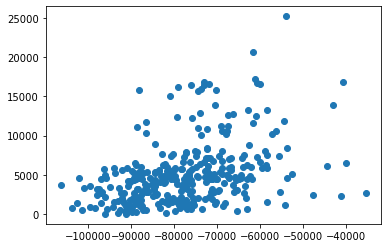

In [78]:
# prediction using the created model in task 7
orig1 = model_LR_norm.predict(predictors)
plt.scatter(orig1,target)

In [79]:
# prediction using the created model in task 7
prediction = model_LR_norm.predict(data_prediction_weekly)
prediction

array([ 2.17950128e+04,  1.85334945e+04,  1.75482551e+04,  1.44971070e+04,
        1.24908227e+04,  1.64420911e+04,  5.04498070e+03, -1.84574510e+03,
       -1.19965944e+04,  7.60442288e+03, -1.06796375e+04, -2.37640255e+04,
       -1.77230247e+04, -1.28368167e+04, -1.96867085e+04, -2.09987304e+04,
       -3.46005303e+04, -1.78924181e+04, -1.97807432e+04, -2.40533779e+04,
       -2.97739432e+04, -3.65510927e+04, -5.10979587e+04, -3.09850767e+04,
       -3.17128144e+04, -4.30619251e+04, -4.75345588e+04, -5.84802877e+04,
       -4.60849602e+04, -3.28195052e+04, -4.62653312e+04, -4.32126570e+04,
       -4.34765155e+04, -4.36397719e+04, -1.70396995e+04, -2.06621668e+04,
       -1.67121837e+04, -2.71538372e+04, -1.56301198e+04, -1.16174178e+04,
       -6.66201755e+03, -5.08089536e+03, -8.72516694e+03, -1.89615304e+04,
       -1.03048621e+04, -1.18642123e+04, -3.95373981e+02,  1.88041455e+04,
        2.90940072e+03,  1.55562024e+04,  7.95139929e+03,  1.92407938e+04,
        4.53422203e+03,  

In [80]:
#data_merged

In [81]:
#data_prediction_weekly

In [82]:
#data_prediction_weekly.iloc[0,:]

In [83]:
#int(prediction[6])

In [84]:
#data_prediction.shape

In [85]:
data_prediction_complete.shape

(2880, 72)

In [86]:
data_prediction_cleaned.shape

(2706, 72)

In [87]:
data_prediction_weekly.shape

(572, 13)

#### Findings 
Summarize your findings and lessons learned.

In [88]:
data_weather.shape, data_weather_complete.shape, data_weather_cleaned.shape, data_weather_weekly.shape, data_merged.shape

((96432, 104), (96432, 83), (95119, 83), (572, 13), (336, 15))

Finding1: The original weather dataset had 96432 rows 104 columns. After handling the missing data and outliers, the dataset shrunk to 95119 rows and 83 columns. Misssing data were filled using interpolation techniques which ultimately lead to reduction of both rows and columns whereas removing outliers didn't change the number of columns but only rows.

Finding2: Out of the 104 weather dataset features, only 13 features were actually relevant to predict the cases of influenza. None of the 13 features had linear relationship with the target varible and also most of those varible showed very little to no correlation with each other (concluded from the pair plot and low values in the off diagonal elemnts in the cross correlation matrix). Only temperature variables showed high correlation with each other.

Finding 3: None of the chosen models( knn and linear regression) performed well on the data_merged dataset (shown by low r2 scores). Out of the two, linear regression performed slightly better. Also standarization of the dataset, resulted in better r2 score.

The classical machine learning methods doesn't seem to fit this data so well. May be deep learning methods can be used to model the data.
